# Problem Statement:
1.What is the main marketing campaign factor that can increase the customer’s decision to subscribe to a term deposit?

2.How accurate can we be in predicting the customer's decision to subscribe to a term deposit?

3.Business interpretation of the different models using Visualisation

4.Business evaluation to convince that our model predicts the best.

# Data Dictionary

### Bank client data:
Age (numeric)
Job : type of job (categorical: 'admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown')

Marital : marital status (categorical: 'divorced', 'married', 'single', 'unknown' ; note: 'divorced' means divorced or widowed)

Education (categorical: 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate', 'professional.course', 'university.degree', 'unknown')

Default: has credit in default? (categorical: 'no', 'yes', 'unknown')

Housing: has housing loan? (categorical: 'no', 'yes', 'unknown')

Loan: has personal loan? (categorical: 'no', 'yes', 'unknown')
### Related with the last contact of the current campaign:
Contact: contact communication type (categorical: 'cellular','telephone')

Month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

Day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

Duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
### Other attributes:
Campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

Pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

Previous: number of contacts performed before this campaign and for this client (numeric)

Poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
### Social and economic context attributes
Emp.var.rate: employment variation rate - quarterly indicator (numeric)

Cons.price.idx: consumer price index - monthly indicator (numeric)

Cons.conf.idx: consumer confidence index - monthly indicator (numeric)

Euribor3m: euribor 3 month rate - daily indicator (numeric)

Nr.employed: number of employees - quarterly indicator (numeric)
### Output variable (desired target):
y - has the client subscribed a term deposit? (binary: 'yes', 'no')


In [1]:
#Importing required libraries for Data Preparation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
plt.rcParams["figure.figsize"]=[15,8]

# Data Collection

In [4]:
df = pd.read_csv('bank-additional-full.csv',sep=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


# Data Understanding

In [5]:
df.shape

(41188, 21)

In [6]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [8]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [8]:
#5 point summary
df.describe() #for numerical variables

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [9]:
df.describe(include=["object"]) #for categorical variables

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


# Data Preprocessing

In [9]:
df.rename(columns={'nr.employed':'No_employed','pdays':'Prev_Contacted_Duration','cons.price.idx':'Cust_Price_Index',
                   'cons.conf.idx':'Cust_Conf_Index','euribor3m':'Euribor_3M','y':'Term_Deposit', 
                   'previous':'Prev_Count','marital':'Marital_Status',},inplace=True)
df.head()

,age,job,Marital_Status,education,default,housing,loan,contact,month,day_of_week,...,campaign,Prev_Contacted_Duration,Prev_Count,poutcome,emp.var.rate,Cust_Price_Index,Cust_Conf_Index,Euribor_3M,No_employed,Term_Deposit
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [10]:
print(df.education.unique())
df.education.replace(['basic.4y','basic.6y','basic.9y'],['4_class','6_class','9_class'],inplace=True)

['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']


In [12]:
#Are there any missing values?
df.isna().sum()

age                        0
job                        0
Marital_Status             0
education                  0
default                    0
housing                    0
loan                       0
contact                    0
month                      0
day_of_week                0
duration                   0
campaign                   0
Prev_Contacted_Duration    0
Prev_Count                 0
poutcome                   0
emp.var.rate               0
Cust_Price_Index           0
Cust_Conf_Index            0
Euribor_3M                 0
No_employed                0
Term_Deposit               0
dtype: int64

There are no missing values but by looking at the data we can see there are unknown values so let's treat them

In [13]:
df[df=="unknown"].count()

age                           0
job                         330
Marital_Status               80
education                  1731
default                    8597
housing                     990
loan                        990
contact                       0
month                         0
day_of_week                   0
duration                      0
campaign                      0
Prev_Contacted_Duration       0
Prev_Count                    0
poutcome                      0
emp.var.rate                  0
Cust_Price_Index              0
Cust_Conf_Index               0
Euribor_3M                    0
No_employed                   0
Term_Deposit                  0
dtype: int64

In [11]:
#treating the unknown values
df["job"].replace(to_replace="unknown", value=df["job"].mode()[0], inplace=True)
df["Marital_Status"].replace(to_replace="unknown", value=df["Marital_Status"].mode()[0], inplace=True)
df["education"].replace(to_replace="unknown", value=df["education"].mode()[0], inplace=True)
df["default"].replace(to_replace="unknown", value="missing", inplace=True)
df["housing"].replace(to_replace="unknown", value=df["housing"].mode()[0], inplace=True)
df["loan"].replace(to_replace="unknown", value=df["loan"].mode()[0], inplace=True)
df[df=="unknown"].count()

age                        0
job                        0
Marital_Status             0
education                  0
default                    0
housing                    0
loan                       0
contact                    0
month                      0
day_of_week                0
duration                   0
campaign                   0
Prev_Contacted_Duration    0
Prev_Count                 0
poutcome                   0
emp.var.rate               0
Cust_Price_Index           0
Cust_Conf_Index            0
Euribor_3M                 0
No_employed                0
Term_Deposit               0
dtype: int64

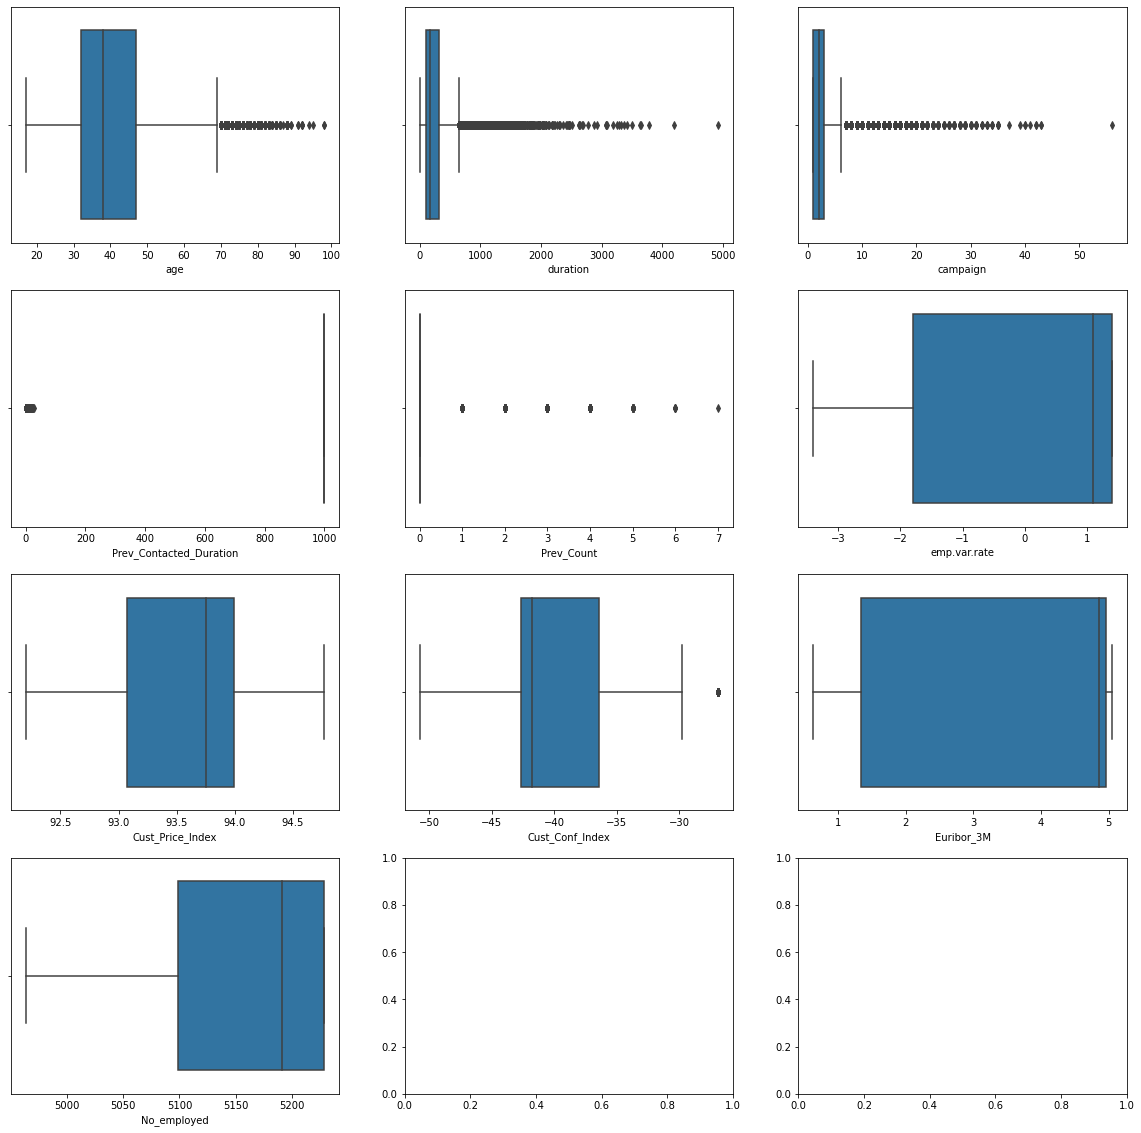

In [12]:
#Are there any outliers

df_num = df.select_dtypes(include=["float64","int64"])
fig, ax = plt.subplots(nrows = 4, ncols = 3, figsize=(20, 20))
for variable, subplot in zip(df_num.columns, ax.flatten()):
    sns.boxplot(df[variable], ax = subplot)
plt.show()


Age, duration, campaign, Prev_contacted_duration,Prev_count and cust_conf_index has outliers, Lets treat these outliers

### Age

In [13]:
df["age"].quantile(0.98)

62.0

In [14]:
df["age"][df["age"]>70].count()

422

There are only 422 people above the age of 70 which is very less compared to the total population and these can be considered old alltogether so we can cap them at 70 itself or say 98th percentile

In [15]:
df["age"][df["age"]>70] =70

<AxesSubplot:xlabel='age'>

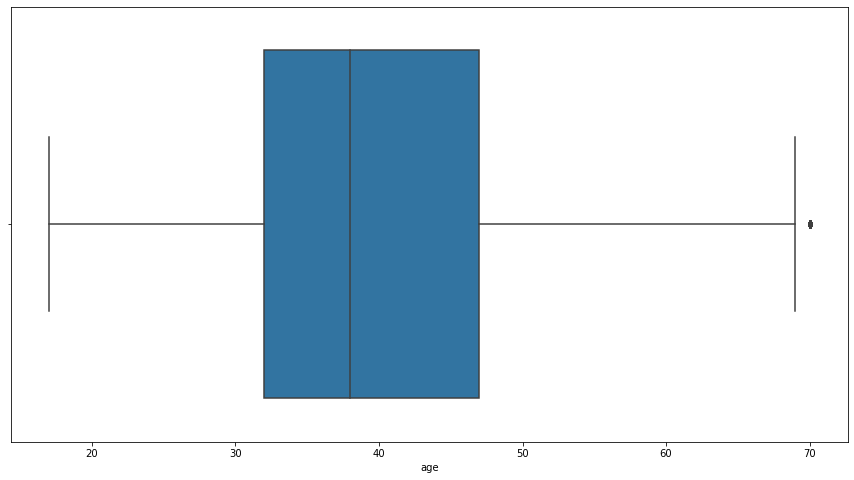

In [16]:
sns.boxplot(df["age"])

### duration 

In [17]:
a=df["duration"].quantile(0.95)
a

752.6500000000015

In [18]:
df["duration"][df["duration"]>a].count()

2060

In [19]:
df["duration"][df["duration"]>a]=a

<AxesSubplot:xlabel='duration'>

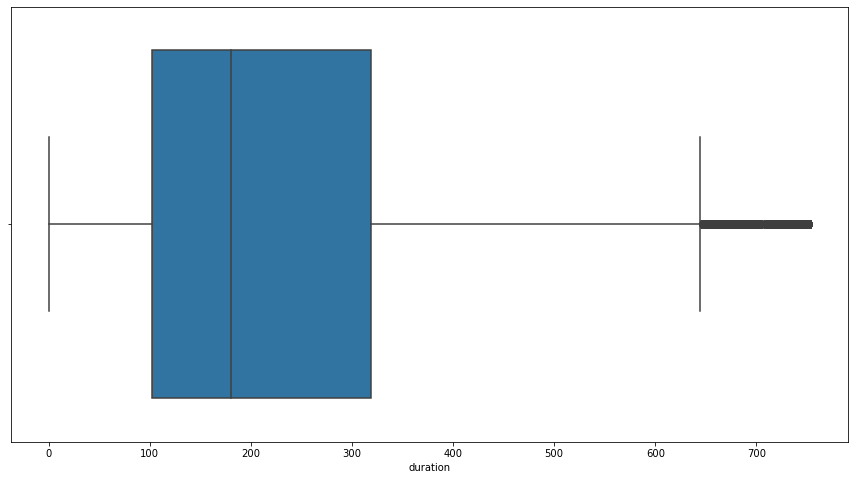

In [20]:
sns.boxplot(df["duration"])

The attribute duration has high outliers stating that with some people the duration of conversation has crossed beyond
1000 seconds but majority of the duration lies between 0 to 600  capping the high outliers to a more reasonable number with majority so that
the the high duration data does not affect while building the model there are still some outlier but these lie in around 80th percentile so we can probably allow that

### Campaign

In [21]:
df["campaign"].quantile(0.97)

9.0

In [22]:
df["campaign"].value_counts()

1     17642
2     10570
3      5341
4      2651
5      1599
6       979
7       629
8       400
9       283
10      225
11      177
12      125
13       92
14       69
17       58
16       51
15       51
18       33
20       30
19       26
21       24
22       17
23       16
24       15
27       11
29       10
28        8
26        8
25        8
31        7
30        7
35        5
32        4
33        4
34        3
42        2
40        2
43        2
56        1
39        1
41        1
37        1
Name: campaign, dtype: int64

Campaign has ignorable instances once it crosses 10 so we can cap it at around 10 since most of the people have been contacted only once or twice while some have been contacted more but instances where people were contacted more than 10 are very less about 800 out of 40k which is very less.

In [23]:
df["campaign"][df["campaign"]>10].count()

869

In [24]:
df["campaign"][df["campaign"]>10]=10

<AxesSubplot:xlabel='campaign'>

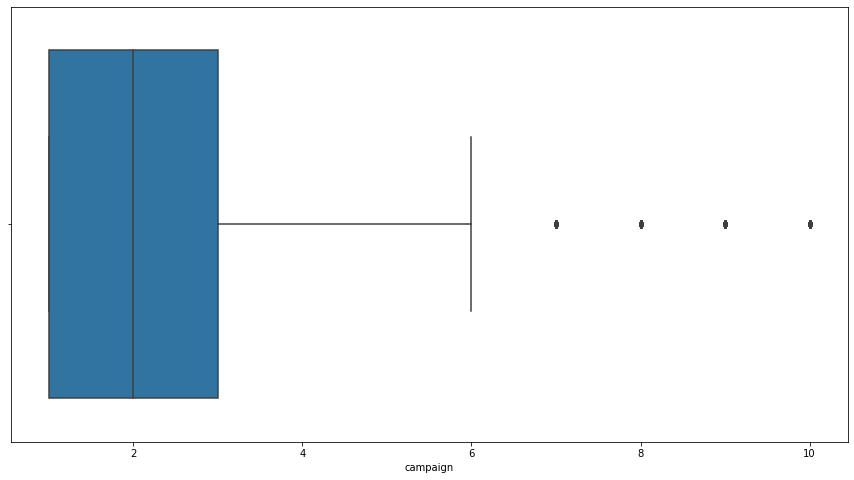

In [25]:
sns.boxplot(df["campaign"])

### Prev_Contacted_Duration

In [26]:
df["Prev_Contacted_Duration"].replace(999,28, inplace=True)

999 just refers to the people who have not contacted not at all, it does not have a significance so number of days passed doesn't matter,  so we can just change the number to 28

In [27]:
df["Prev_Contacted_Duration"].quantile(0.96)

28.0

In [28]:
df["Prev_Contacted_Duration"].value_counts()

28    39673
3       439
6       412
4       118
9        64
2        61
7        60
12       58
10       52
5        46
13       36
11       28
1        26
15       24
14       20
8        18
0        15
16       11
17        8
18        7
22        3
19        3
21        2
25        1
26        1
27        1
20        1
Name: Prev_Contacted_Duration, dtype: int64

In [29]:
df["Prev_Contacted_Duration"][df["Prev_Contacted_Duration"]>16]=16

<AxesSubplot:xlabel='Prev_Contacted_Duration'>

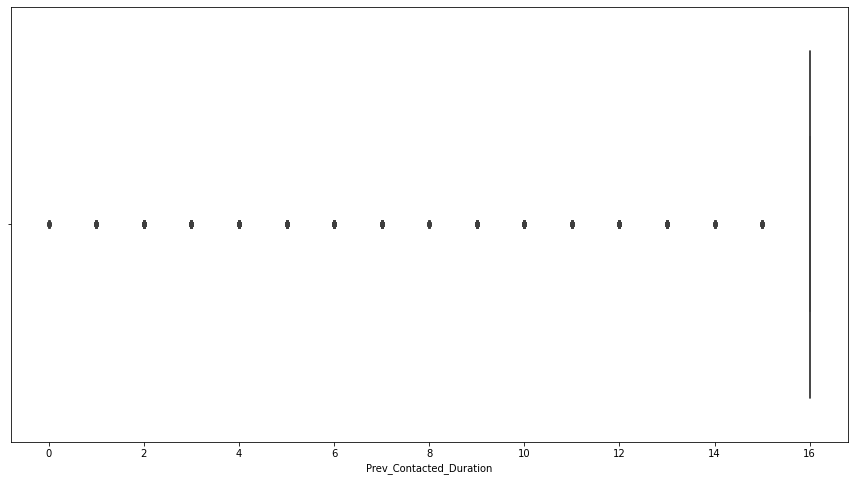

In [30]:
sns.boxplot(df["Prev_Contacted_Duration"])

We just removed extreme values, eventhough there are outliers its not extreme outliers

### prev_count

In [31]:
df["Prev_Count"].value_counts()

0    35563
1     4561
2      754
3      216
4       70
5       18
6        5
7        1
Name: Prev_Count, dtype: int64

In [32]:
df["Prev_Count"][df["Prev_Count"]>3]=3

This has only 4 significant values remaining have very less instances to call them significant, since this makes the values
discrete in nature hence can be treated as categorical

# Data Visualisation

Lets Split our Dataframe in  4 categories 
1. Client Data Analysis
2.Related with the last contact of the client
3.Social and economic Context attributes
4.Other Attributes

## 1.Client Data Analysis

In [33]:
Client=df.iloc[:,0:7]
Client.head()

,age,job,Marital_Status,education,default,housing,loan
0,56,housemaid,married,4_class,no,no,no
1,57,services,married,high.school,missing,no,no
2,37,services,married,high.school,no,yes,no
3,40,admin.,married,6_class,no,no,no
4,56,services,married,high.school,no,no,yes


### 1.1. Age

In [34]:
Client["age"].value_counts()

31    1947
32    1846
33    1833
36    1780
35    1759
34    1745
30    1714
37    1475
29    1453
39    1432
38    1407
41    1278
40    1161
42    1142
45    1103
43    1055
46    1030
44    1011
28    1001
48     979
47     928
50     875
27     851
49     839
52     779
51     754
53     733
56     704
26     698
54     684
55     648
57     646
25     598
58     576
70     469
24     463
59     463
60     283
23     226
22     137
21     102
61      73
20      65
62      62
66      57
64      57
63      55
65      44
19      42
69      34
68      33
18      28
67      26
17       5
Name: age, dtype: int64

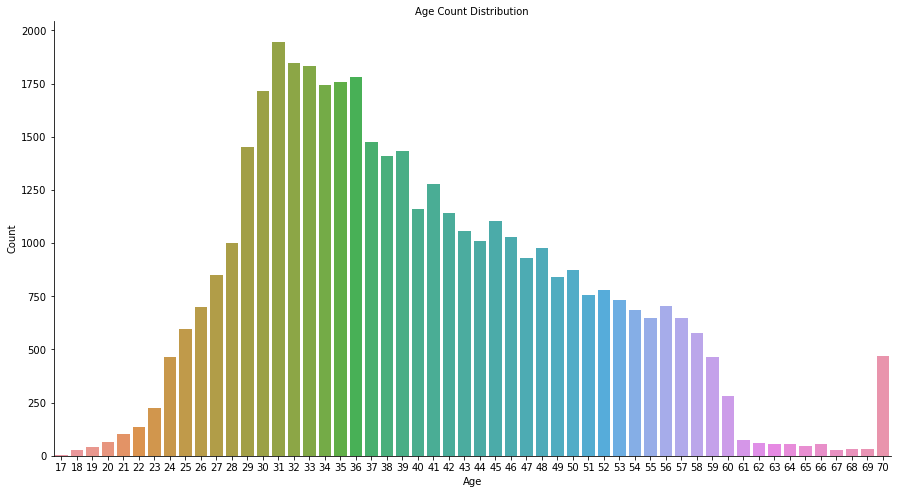

In [35]:
#Univariate Analysis
fig, ax = plt.subplots()
fig.set_size_inches(15,8)
sns.countplot(x="age", data=Client)
ax.set_xlabel('Age', fontsize=10)
ax.set_ylabel('Count', fontsize=10)
ax.set_title('Age Count Distribution', fontsize=10)
sns.despine()

<AxesSubplot:xlabel='age', ylabel='count'>

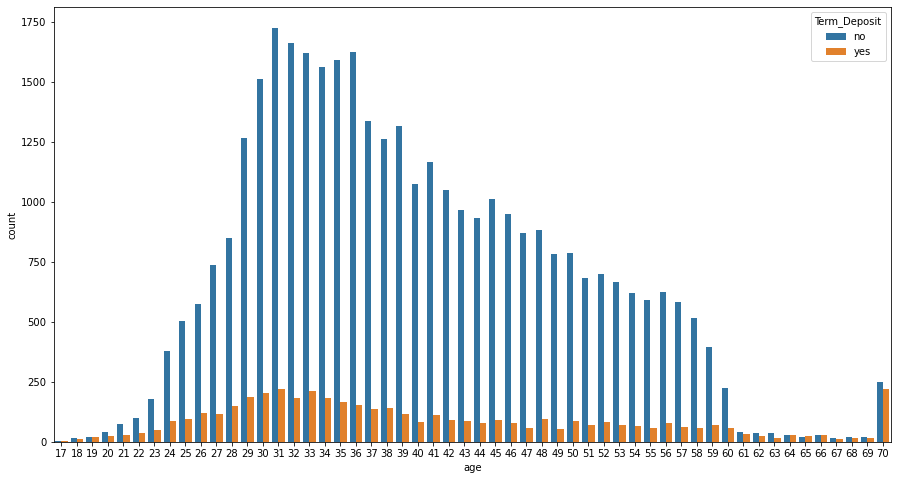

In [36]:
#Bivariate Analysis with respect to target variable
sns.countplot(df["age"], hue=df["Term_Deposit"])

In [37]:
# We think the best way to give a precisly insight about dispersion is using the CV (coefficient variation) (STD/MEAN)*100
#    cv < 15%, low dispersion
#    cv > 30%, high dispersion
print('CV  :',round(Client['age'].std()*100/Client['age'].mean(), 1), ', High middle dispersion')

CV  : 25.4 , High middle dispersion


### 1.2 Jobs 

In [38]:
Client['job'].unique()

array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed',
       'entrepreneur', 'student'], dtype=object)

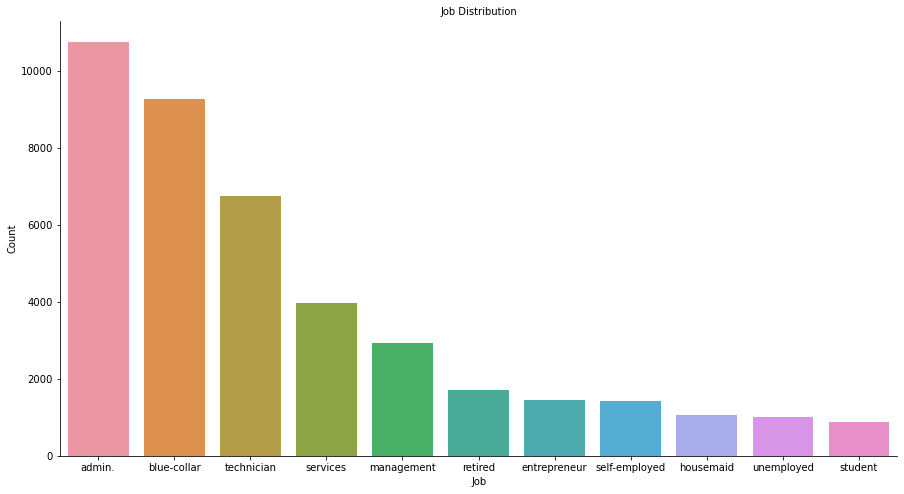

In [39]:
#Univariate Analysis
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)
sns.countplot(x = 'job', data = Client,order = Client['job'].value_counts().index)
ax.set_xlabel('Job', fontsize=10)
ax.set_ylabel('Count', fontsize=10)
ax.set_title('Job Distribution', fontsize=10)
sns.despine()

<AxesSubplot:xlabel='job', ylabel='count'>

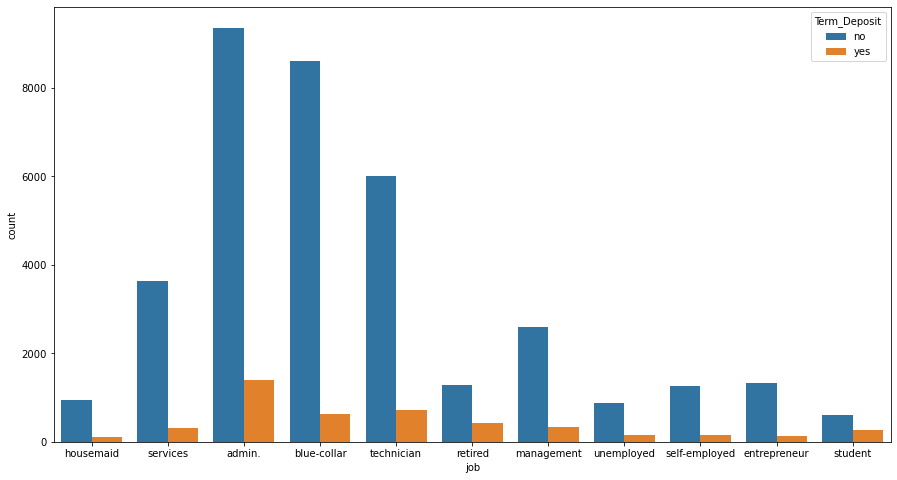

In [40]:
#Bivariate Analysis with respect to target variable
sns.countplot(df["job"], hue=df["Term_Deposit"])

### 1.3 Maritial Status

In [41]:
Client['Marital_Status'].unique()

array(['married', 'single', 'divorced'], dtype=object)

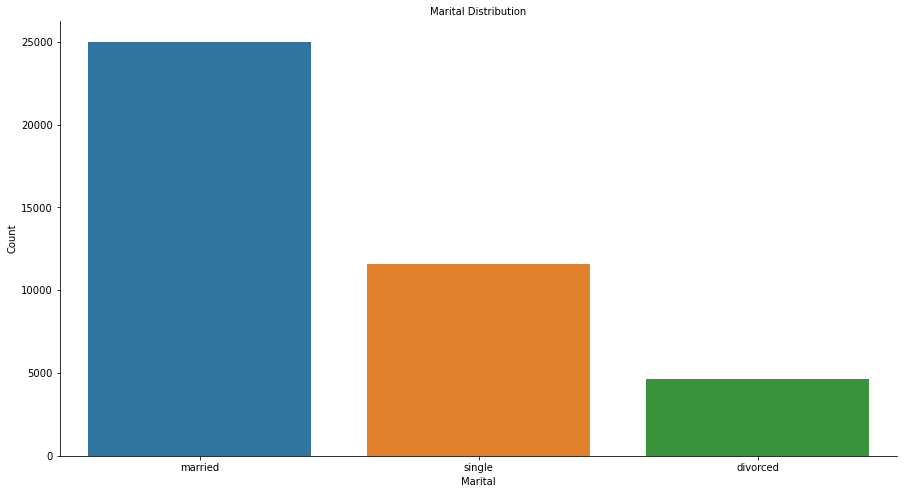

In [42]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)
sns.countplot(x = 'Marital_Status', data = Client,order = Client['Marital_Status'].value_counts().index)
ax.set_xlabel('Marital', fontsize=10)
ax.set_ylabel('Count', fontsize=10)
ax.set_title('Marital Distribution', fontsize=10)
sns.despine()

<AxesSubplot:xlabel='Marital_Status', ylabel='count'>

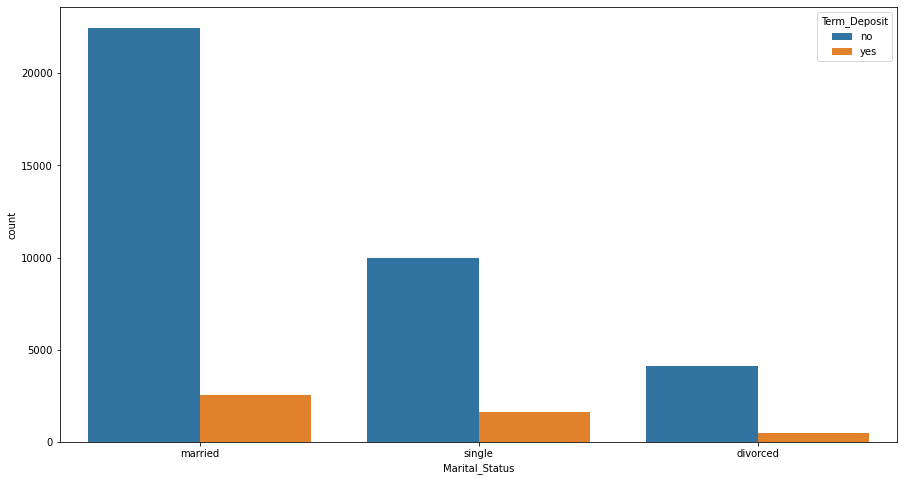

In [43]:
#Bivariate Analysis with respect to target variable
sns.countplot(df["Marital_Status"], hue=df["Term_Deposit"])

 ### 1.4 Education

In [44]:
print('Education:', Client['education'].unique())

Education: ['4_class' 'high.school' '6_class' '9_class' 'professional.course'
 'university.degree' 'illiterate']


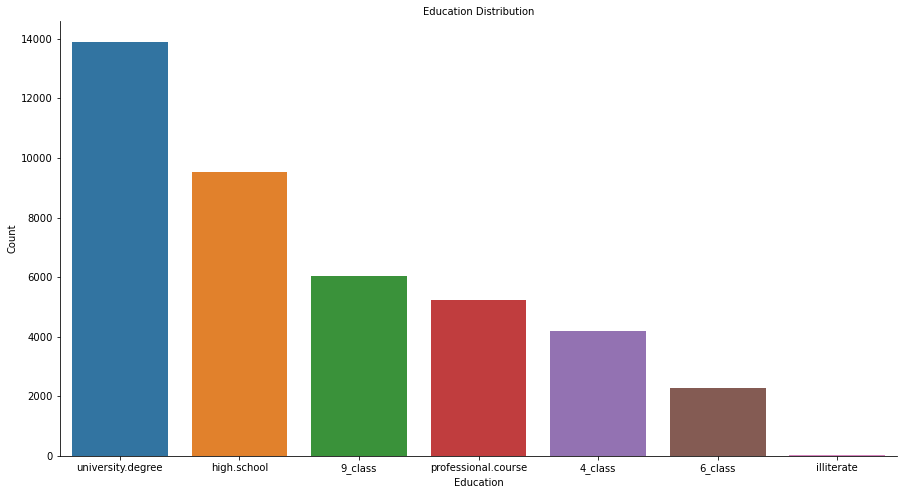

In [45]:
#Univariate Analysis
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)
sns.countplot(x = 'education', data = Client,order = Client['education'].value_counts().index)
ax.set_xlabel('Education', fontsize=10)
ax.set_ylabel('Count', fontsize=10)
ax.set_title('Education Distribution', fontsize=10)
sns.despine()

<AxesSubplot:xlabel='education', ylabel='count'>

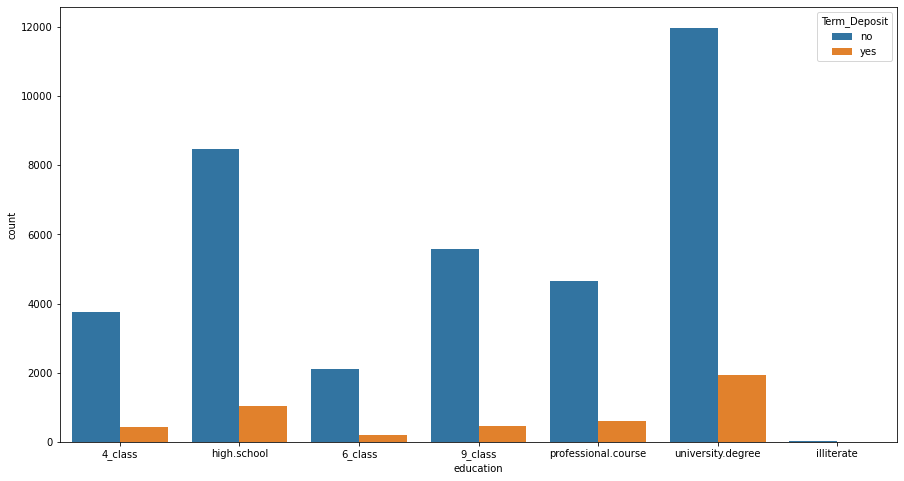

In [46]:
#Bivariate Analysis with respect to target variable
sns.countplot(df["education"], hue=df["Term_Deposit"])

### 1.5 Default, Housing, Loan

In [47]:
print('Default:\n', Client['default'].unique())
print('Housing:\n', Client['housing'].unique())
print('Loan:\n', Client['loan'].unique())

Default:
 ['no' 'missing' 'yes']
Housing:
 ['no' 'yes']
Loan:
 ['no' 'yes']


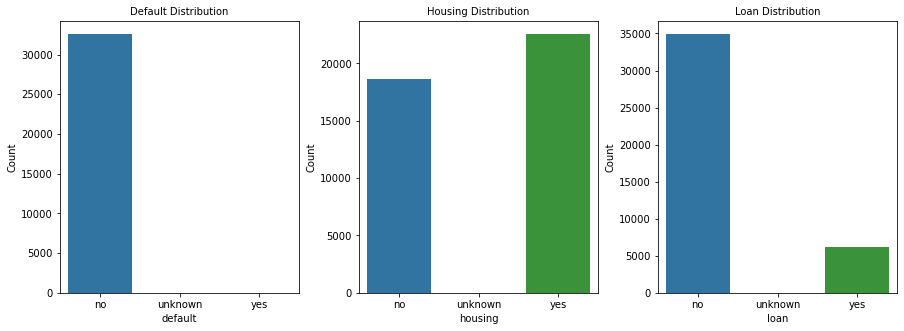

In [48]:
# Default
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (15,5))
sns.countplot(x = 'default', data = Client, ax = ax1, order = ['no', 'unknown', 'yes'])
ax1.set_title('Default Distribution', fontsize=10)
ax1.set_ylabel('Count', fontsize=10)
ax1.tick_params(labelsize=10)

# Housing
sns.countplot(x = 'housing', data = Client, ax = ax2, order = ['no', 'unknown', 'yes'])
ax2.set_title('Housing Distribution', fontsize=10)
ax2.set_ylabel('Count', fontsize=10)
ax2.tick_params(labelsize=10)

# Loan
sns.countplot(x = 'loan', data = Client, ax = ax3, order = ['no', 'unknown', 'yes'])
ax3.set_title('Loan Distribution', fontsize=10)
ax3.set_ylabel('Count', fontsize=10)
ax3.tick_params(labelsize=10)
plt.subplots_adjust(wspace=0.25)

<AxesSubplot:xlabel='default', ylabel='count'>

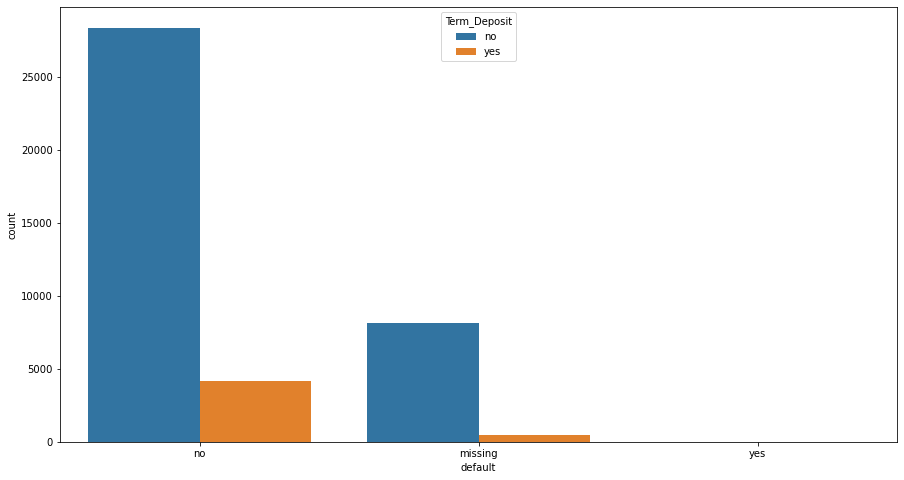

In [49]:
#Bivariate Analysis with respect to target variable
sns.countplot(df['default'], hue=df["Term_Deposit"])

<AxesSubplot:xlabel='housing', ylabel='count'>

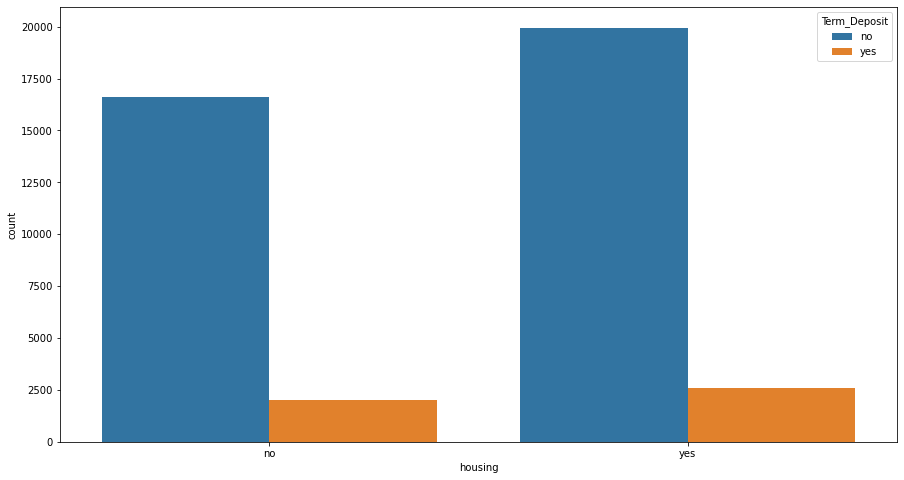

In [50]:
sns.countplot(df['housing'], hue=df["Term_Deposit"])

<AxesSubplot:xlabel='loan', ylabel='count'>

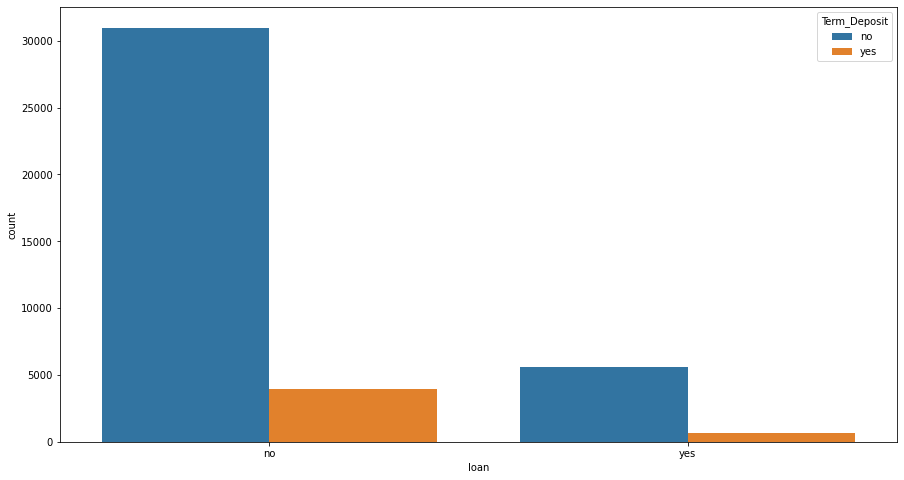

In [51]:
sns.countplot(df['loan'], hue=df["Term_Deposit"])

## 2. Related with the last contact of the Client

In [52]:
Client_LC=  df.iloc[: , 7:11]
Client_LC.head()

,contact,month,day_of_week,duration
0,telephone,may,mon,261.0
1,telephone,may,mon,149.0
2,telephone,may,mon,226.0
3,telephone,may,mon,151.0
4,telephone,may,mon,307.0


### 2.1 Duration

In [53]:
Client_LC["duration"].describe()

count    41188.000000
mean       241.515830
std        193.422383
min          0.000000
25%        102.000000
50%        180.000000
75%        319.000000
max        752.650000
Name: duration, dtype: float64

<AxesSubplot:>

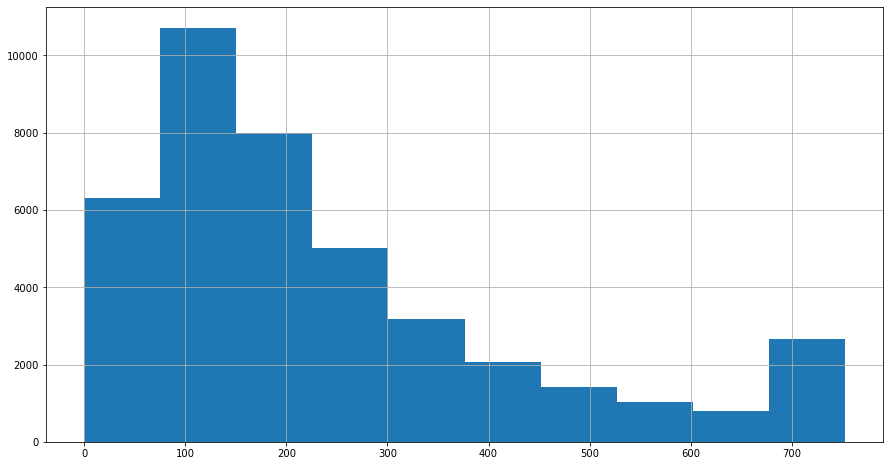

In [54]:
Client_LC["duration"].hist()

<AxesSubplot:xlabel='duration', ylabel='Count'>

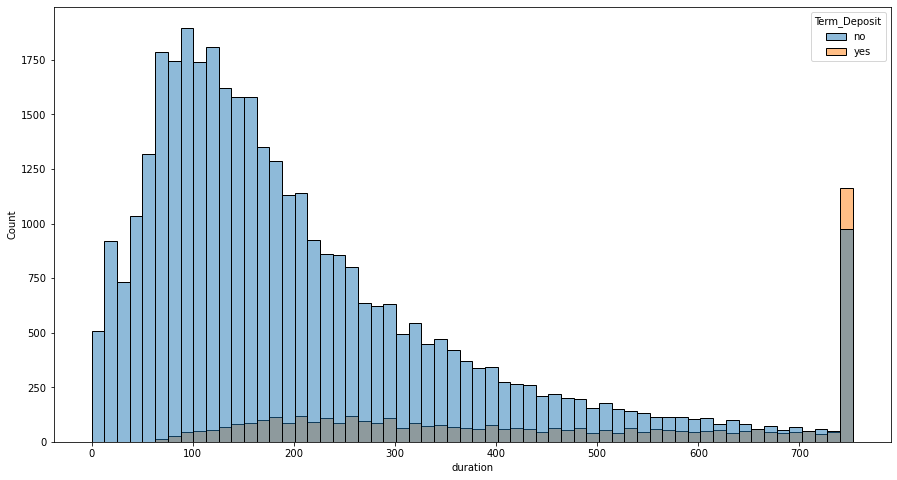

In [55]:
#Bivariate Analysis with respect to target variable
sns.histplot(x='duration', hue="Term_Deposit", data=df)

In [56]:
#CV
print('CV  :',round(Client_LC['duration'].std()*100/Client_LC['duration'].mean(), 1), ', Very High dispersion')

CV  : 80.1 , Very High dispersion


# 2.2  Contact, Months, Days of week

In [57]:
print("Kind of Contact: \n", Client_LC['contact'].unique())
print("\nKind of Months: \n", Client_LC['month'].unique())
print("\nKind of Days: \n", Client_LC['day_of_week'].unique())

Kind of Contact: 
 ['telephone' 'cellular']

Kind of Months: 
 ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']

Kind of Days: 
 ['mon' 'tue' 'wed' 'thu' 'fri']


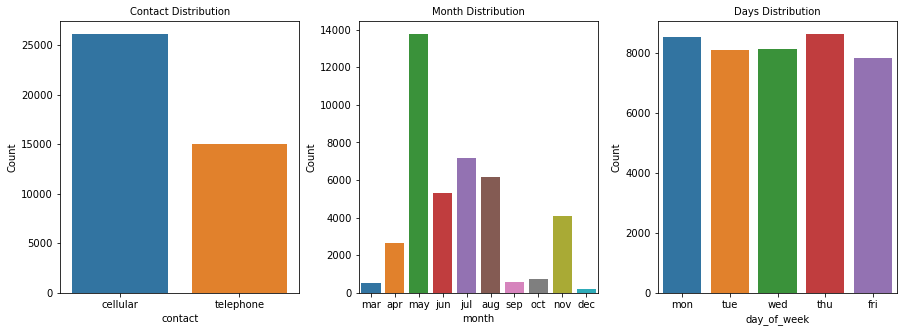

In [58]:
#Contact
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (15,5))
sns.countplot(x = 'contact', data = Client_LC, ax = ax1, order = Client_LC['contact'].value_counts().index)
ax1.set_title('Contact Distribution', fontsize=10)
ax1.set_ylabel('Count', fontsize=10)
ax1.tick_params(labelsize=10)

# Months
sns.countplot(x = 'month', data = Client_LC, ax = ax2, order= ['mar','apr','may','jun','jul','aug' ,'sep','oct','nov','dec'])
ax2.set_title('Month Distribution', fontsize=10)
ax2.set_ylabel('Count', fontsize=10)
ax2.tick_params(labelsize=10)

# Days
sns.countplot(x = 'day_of_week', data = Client_LC, ax = ax3)
ax3.set_title('Days Distribution', fontsize=10)
ax3.set_ylabel('Count', fontsize=10)
ax3.tick_params(labelsize=10)
plt.subplots_adjust(wspace=0.25)

<AxesSubplot:xlabel='contact', ylabel='count'>

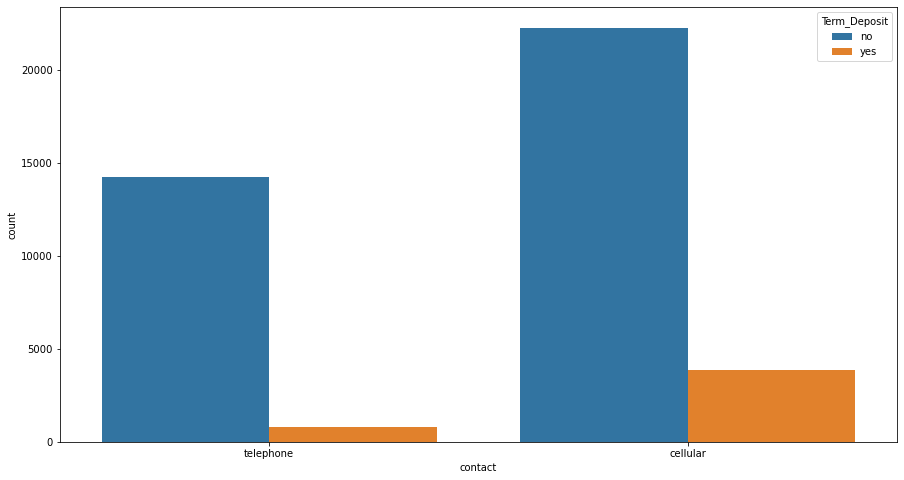

In [59]:
#Bivariate Analysis with respect to target variable
sns.countplot(x='contact', hue="Term_Deposit", data=df)

<AxesSubplot:xlabel='month', ylabel='count'>

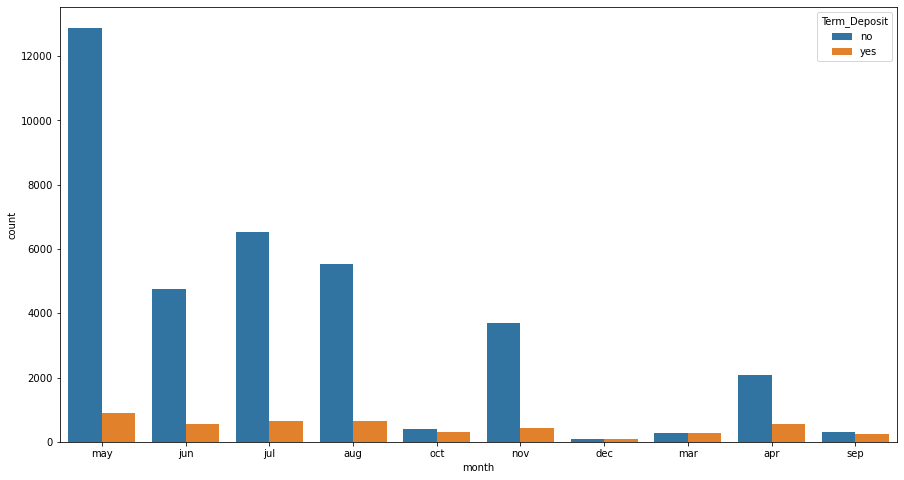

In [60]:
sns.countplot(x='month', hue="Term_Deposit", data=df)

<AxesSubplot:xlabel='day_of_week', ylabel='count'>

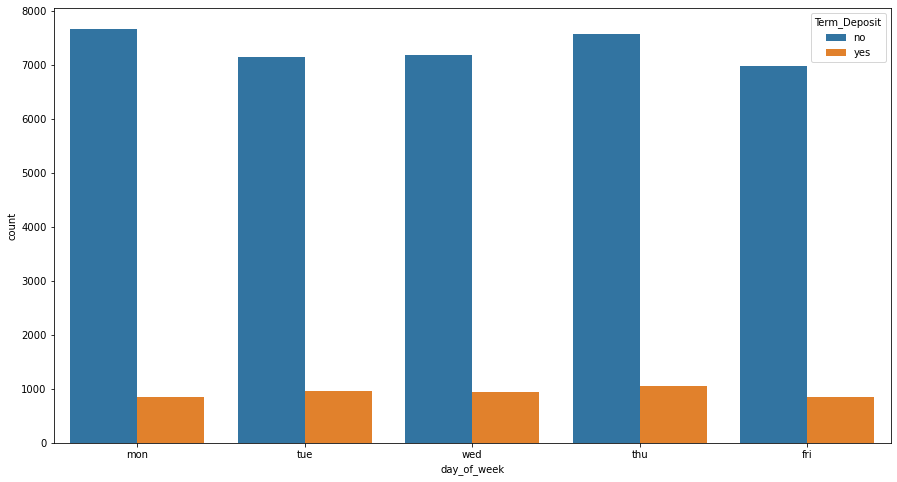

In [61]:
sns.countplot(x='day_of_week', hue="Term_Deposit", data=df)

## 3. Social and economic context attributes 

In [62]:
bank_se = df.loc[: , ['emp.var.rate','Cust_Price_Index', 'Cust_Conf_Index', 'Euribor_3M', 'No_employed']]
bank_se.head()

,emp.var.rate,Cust_Price_Index,Cust_Conf_Index,Euribor_3M,No_employed
0,1.1,93.994,-36.4,4.857,5191.0
1,1.1,93.994,-36.4,4.857,5191.0
2,1.1,93.994,-36.4,4.857,5191.0
3,1.1,93.994,-36.4,4.857,5191.0
4,1.1,93.994,-36.4,4.857,5191.0


### 3.1 emp.var.rate

<AxesSubplot:xlabel='emp.var.rate', ylabel='Count'>

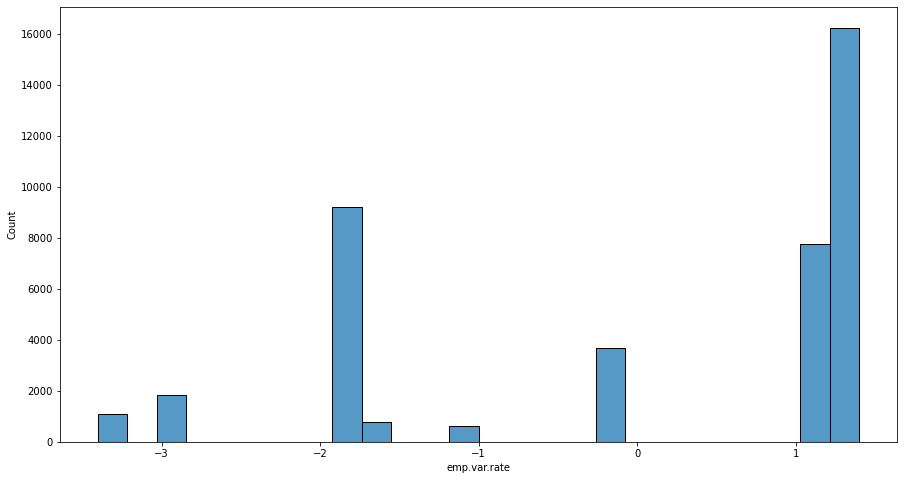

In [63]:
#Univariate analysis
sns.histplot(bank_se["emp.var.rate"])

<AxesSubplot:xlabel='emp.var.rate', ylabel='count'>

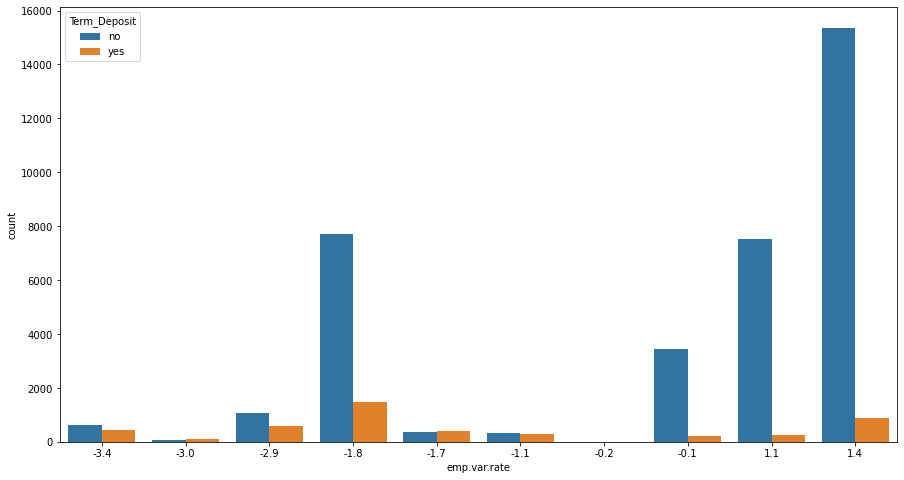

In [64]:
#Bivariate Analysis with respect to target variable
sns.countplot(x='emp.var.rate', hue="Term_Deposit", data=df)

### 3.2 Cust_Price_index

In [65]:
bank_se["Cust_Price_Index"].describe()

count    41188.000000
mean        93.575664
std          0.578840
min         92.201000
25%         93.075000
50%         93.749000
75%         93.994000
max         94.767000
Name: Cust_Price_Index, dtype: float64

In [66]:
print('CV  :',round(bank_se['Cust_Price_Index'].std()*100/bank_se['Cust_Price_Index'].mean(), 1), ', very low dispersion')

CV  : 0.6 , very low dispersion


<AxesSubplot:xlabel='Cust_Price_Index', ylabel='count'>

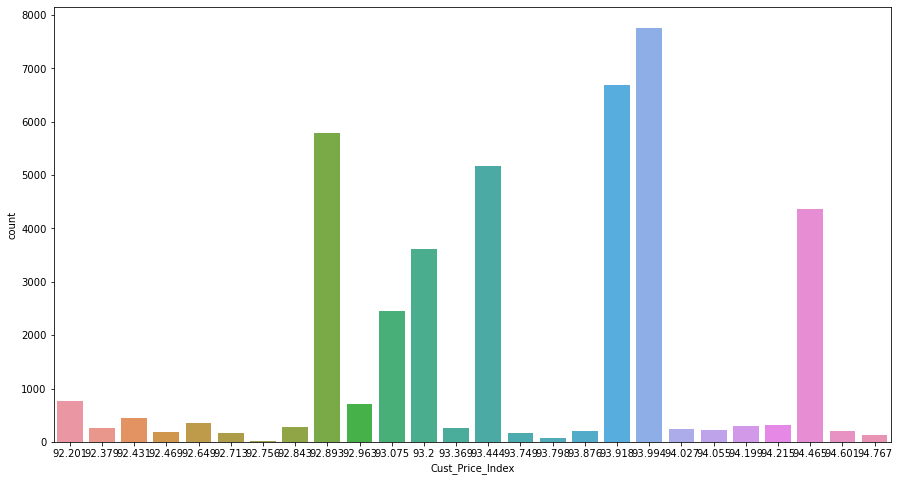

In [67]:
#Univariate analysis
sns.countplot(bank_se["Cust_Price_Index"])

<AxesSubplot:xlabel='Cust_Price_Index', ylabel='count'>

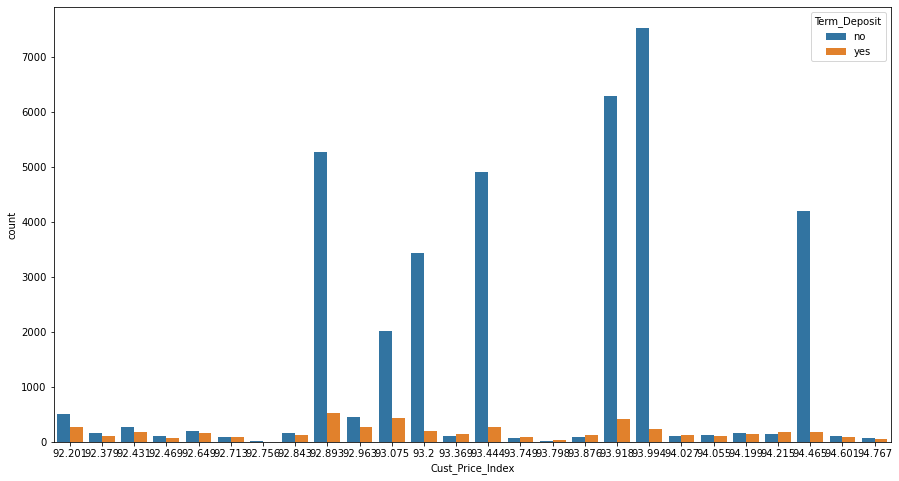

In [68]:
#Bivariate Analysis with respect to target variable
sns.countplot(x='Cust_Price_Index', hue="Term_Deposit", data=df)

### 3.3 Cust_Conf_index

In [69]:
bank_se["Cust_Conf_Index"].describe()

count    41188.000000
mean       -40.502600
std          4.628198
min        -50.800000
25%        -42.700000
50%        -41.800000
75%        -36.400000
max        -26.900000
Name: Cust_Conf_Index, dtype: float64

<AxesSubplot:xlabel='Cust_Conf_Index', ylabel='count'>

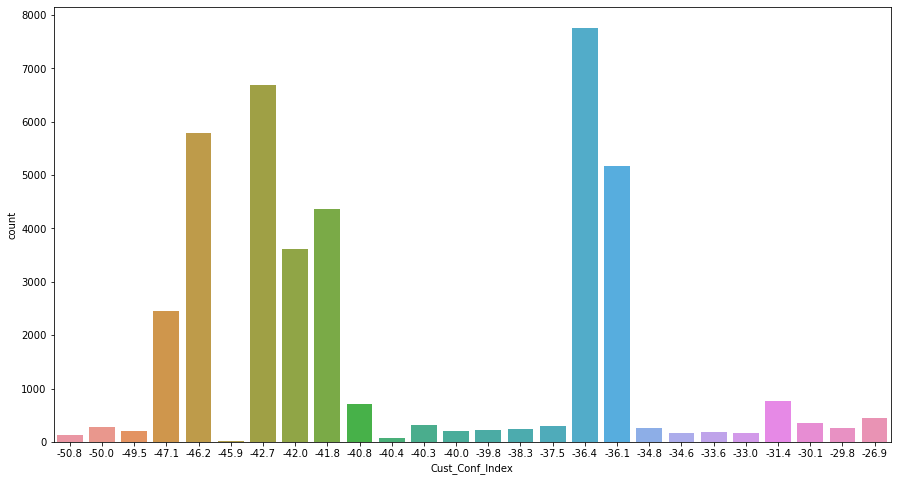

In [70]:
#Univariate analysis
sns.countplot(bank_se["Cust_Conf_Index"])

<AxesSubplot:xlabel='Cust_Conf_Index', ylabel='count'>

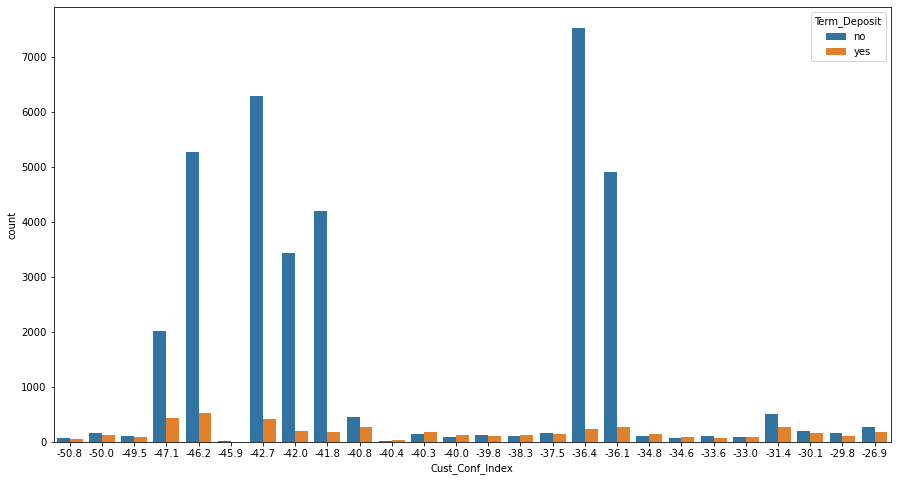

In [71]:
#Bivariate Analysis with respect to target variable
sns.countplot(x='Cust_Conf_Index', hue="Term_Deposit", data=df)

### 3.4 Euribor_3M

In [72]:
bank_se["Euribor_3M"].describe()

count    41188.000000
mean         3.621291
std          1.734447
min          0.634000
25%          1.344000
50%          4.857000
75%          4.961000
max          5.045000
Name: Euribor_3M, dtype: float64

<AxesSubplot:xlabel='Euribor_3M', ylabel='Density'>

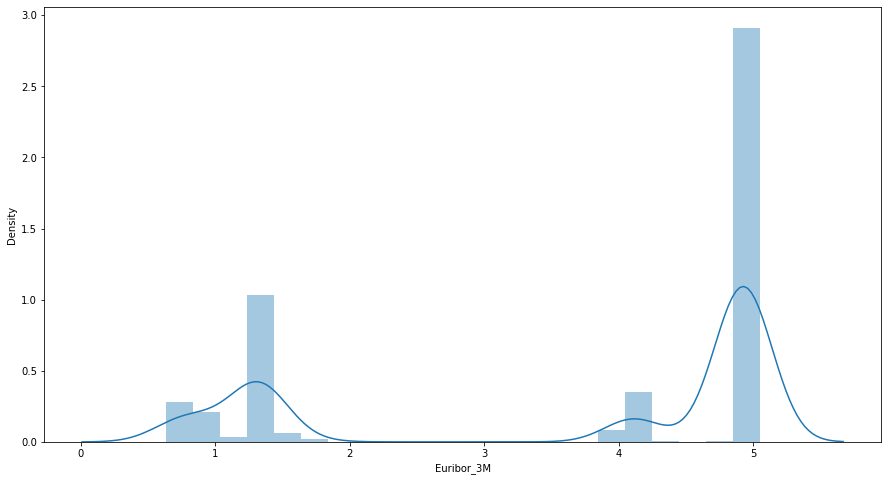

In [73]:
#Univariate analysis
sns.distplot(bank_se["Euribor_3M"])

<AxesSubplot:xlabel='Euribor_3M', ylabel='Count'>

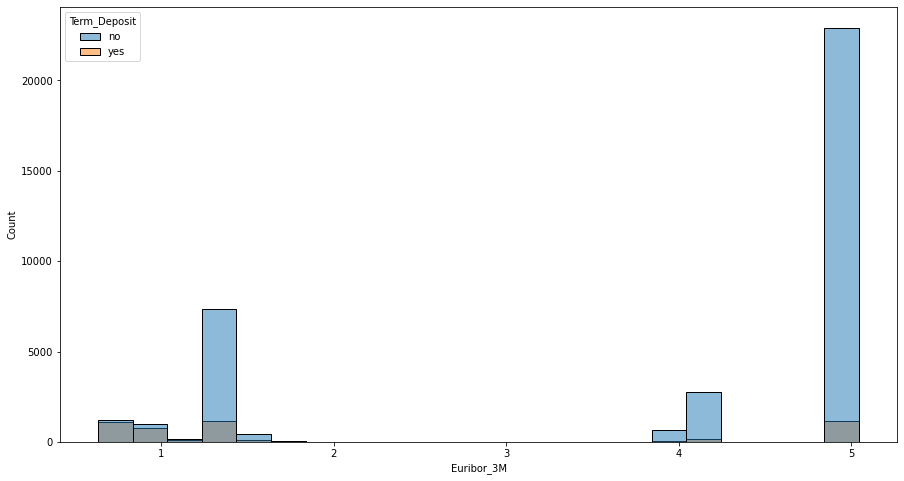

In [74]:
#Bivariate Analysis with respect to target variable
sns.histplot(x='Euribor_3M', hue="Term_Deposit", data=df)

### 3.5 No_employed

In [75]:
bank_se["No_employed"].describe()

count    41188.000000
mean      5167.035911
std         72.251528
min       4963.600000
25%       5099.100000
50%       5191.000000
75%       5228.100000
max       5228.100000
Name: No_employed, dtype: float64

<AxesSubplot:xlabel='No_employed', ylabel='count'>

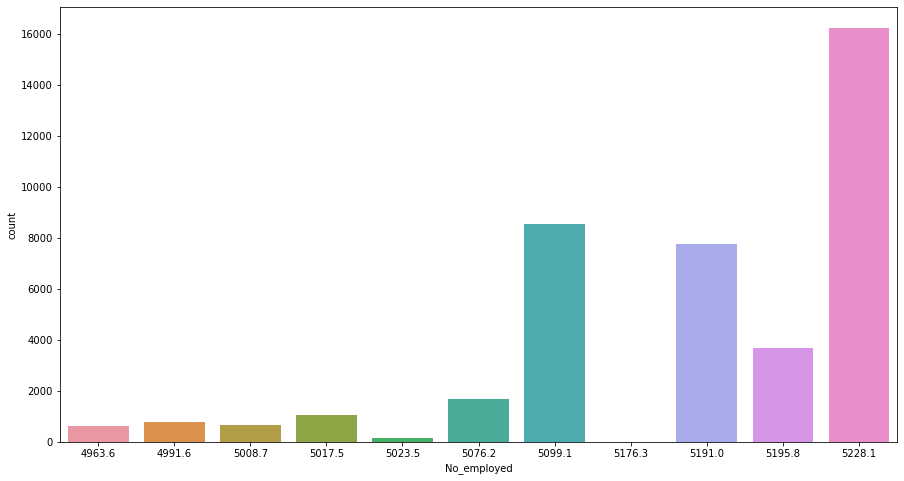

In [76]:
#Univariate analysis
sns.countplot(bank_se["No_employed"])

<AxesSubplot:xlabel='No_employed', ylabel='Count'>

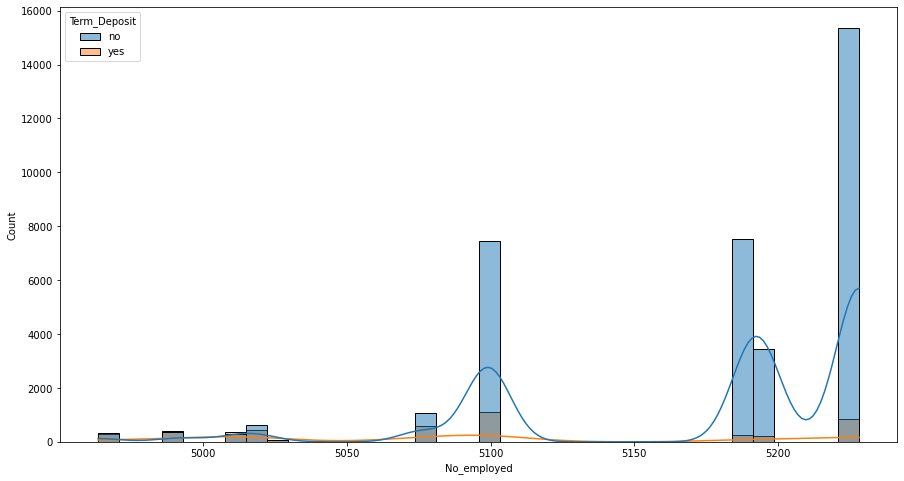

In [77]:
#Bivariate Analysis with respect to target variable
sns.histplot(x='No_employed', hue="Term_Deposit", data=df, kde=True)

## 4. Other attributes related to campaign

In [78]:
bank_o = df.loc[: , ['campaign', 'Prev_Contacted_Duration','Prev_Count', 'poutcome']]
bank_o.head()

,campaign,Prev_Contacted_Duration,Prev_Count,poutcome
0,1,16,0,nonexistent
1,1,16,0,nonexistent
2,1,16,0,nonexistent
3,1,16,0,nonexistent
4,1,16,0,nonexistent


### 4.1 campaign

In [79]:
bank_o["campaign"].describe()

count    41188.000000
mean         2.436826
std          2.030377
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         10.000000
Name: campaign, dtype: float64

<AxesSubplot:xlabel='campaign', ylabel='count'>

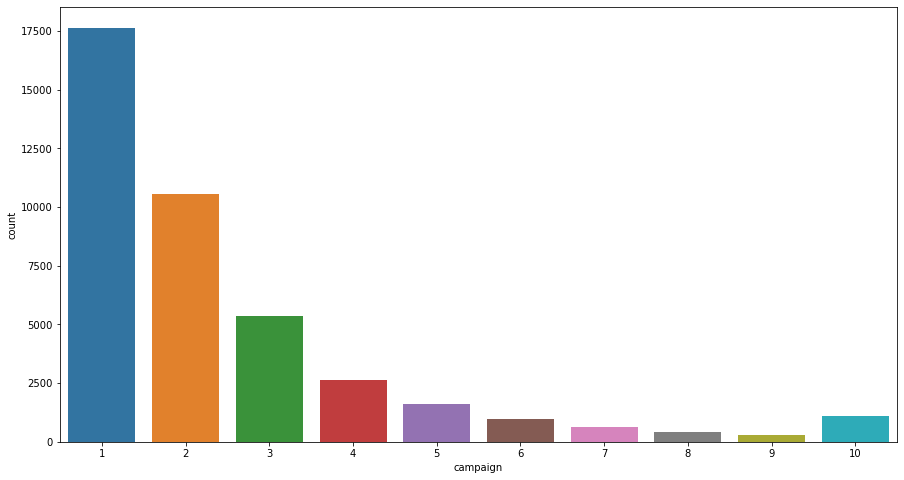

In [80]:
#Univariate analysis
sns.countplot(bank_o["campaign"])

<AxesSubplot:xlabel='campaign', ylabel='count'>

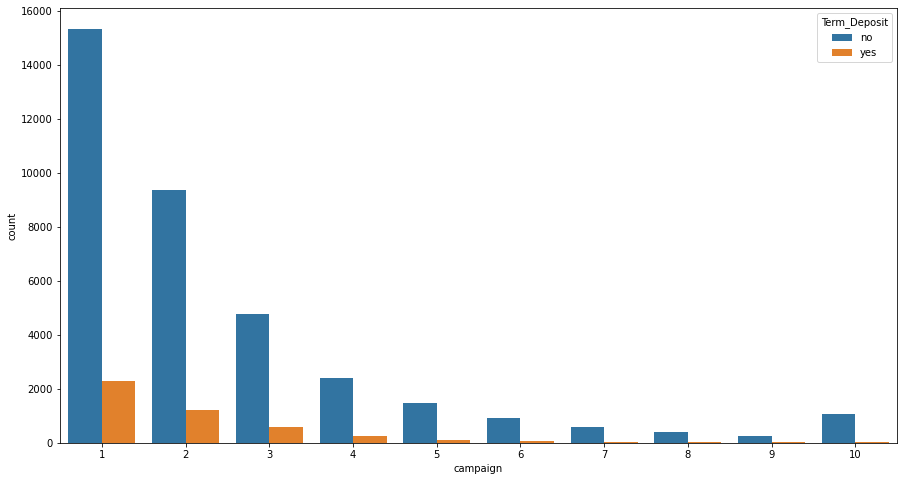

In [81]:
#Bivariate Analysis with respect to target variable
sns.countplot(x='campaign', hue="Term_Deposit", data=df)

### 4.2 Prev_Contacted_duration

In [82]:
bank_o["Prev_Contacted_Duration"].describe()

count    41188.000000
mean        15.630451
std          2.013901
min          0.000000
25%         16.000000
50%         16.000000
75%         16.000000
max         16.000000
Name: Prev_Contacted_Duration, dtype: float64

<AxesSubplot:xlabel='Prev_Contacted_Duration', ylabel='count'>

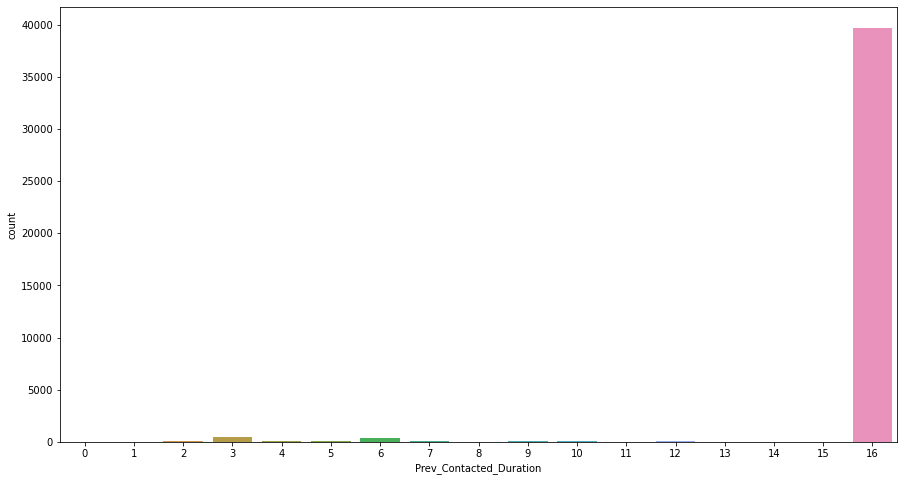

In [83]:
#Univariate analysis
sns.countplot(bank_o["Prev_Contacted_Duration"])

<AxesSubplot:xlabel='Prev_Contacted_Duration', ylabel='count'>

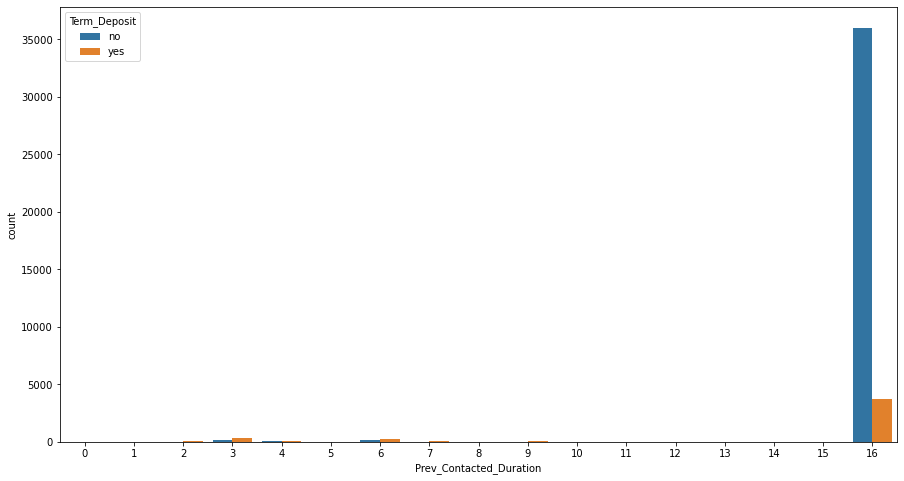

In [84]:
#Bivariate Analysis with respect to target variable
sns.countplot(x='Prev_Contacted_Duration', hue="Term_Deposit", data=df)

### 4.3 prev_count

In [85]:
bank_o["Prev_Count"].describe()

count    41188.000000
mean         0.169928
std          0.472048
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          3.000000
Name: Prev_Count, dtype: float64

<AxesSubplot:xlabel='Prev_Count', ylabel='count'>

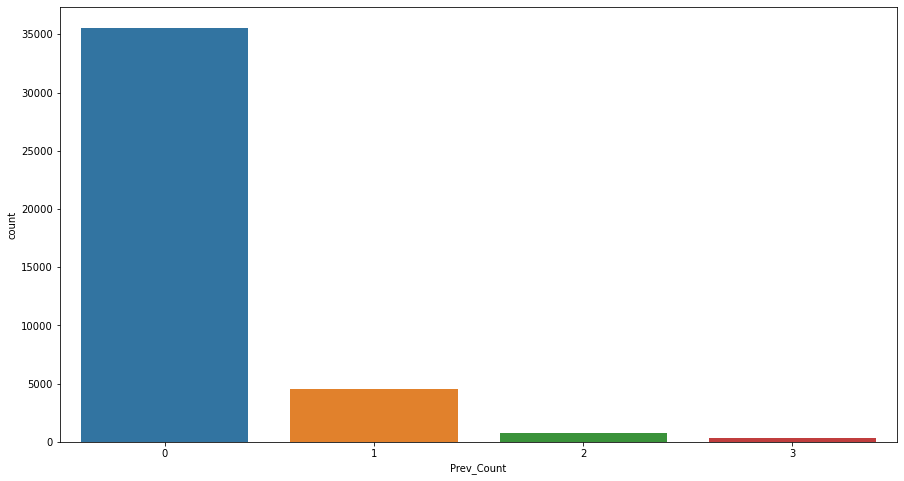

In [86]:
#Univariate analysis
sns.countplot(bank_o["Prev_Count"])

<AxesSubplot:xlabel='Prev_Count', ylabel='count'>

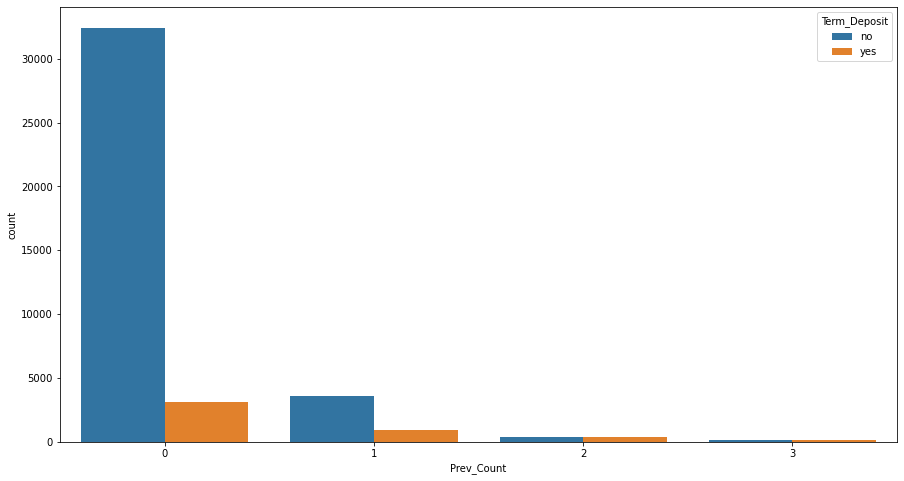

In [87]:
#Bivariate Analysis with respect to target variable
sns.countplot(x='Prev_Count', hue="Term_Deposit", data=df)

### 4.4 poutcome

In [88]:
bank_o["poutcome"].describe()

count           41188
unique              3
top       nonexistent
freq            35563
Name: poutcome, dtype: object

<AxesSubplot:xlabel='poutcome', ylabel='count'>

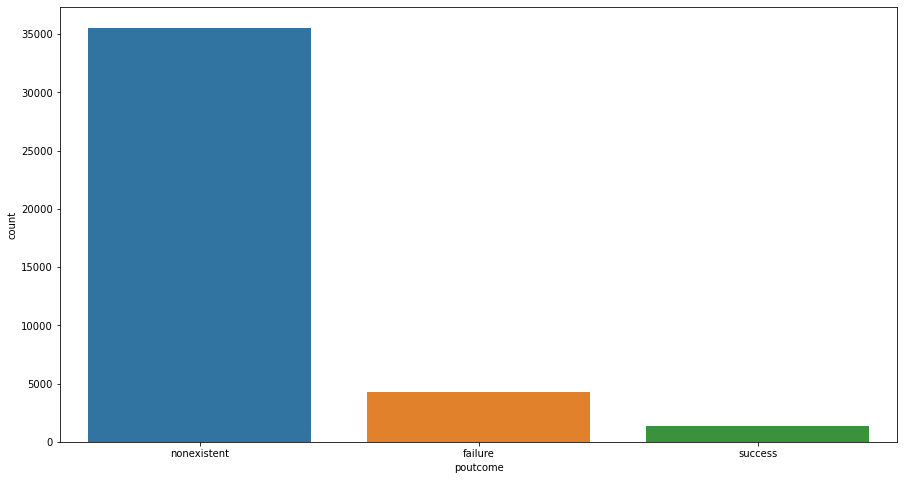

In [89]:
#Univariate analysis
sns.countplot(bank_o["poutcome"])

<AxesSubplot:xlabel='poutcome', ylabel='count'>

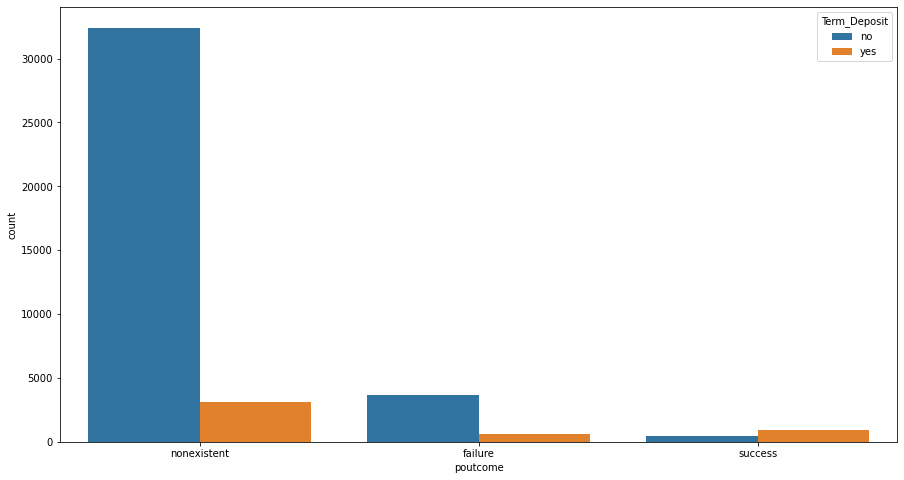

In [90]:
#Bivariate Analysis with respect to target variable
sns.countplot(x='poutcome', hue="Term_Deposit", data=df)

# Correlation between variables

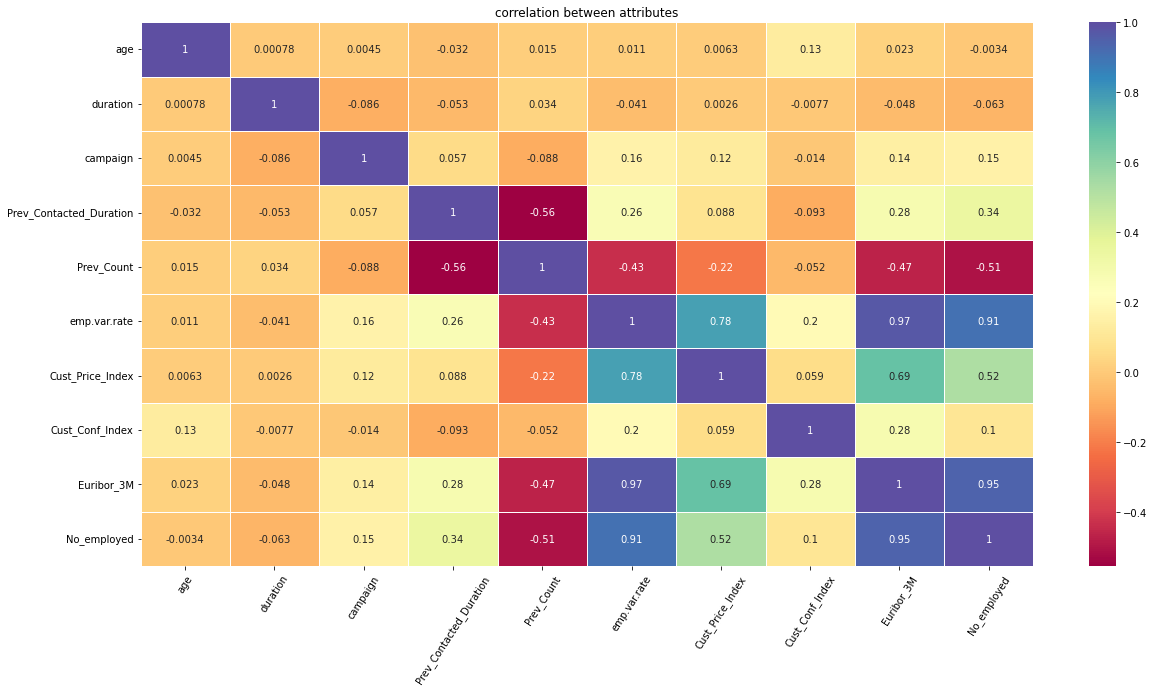

In [91]:

plt.figure(figsize=(20, 10))
plt.title('correlation between attributes')
sns.heatmap(df.corr(),lw=1,linecolor='white',cmap='Spectral',annot=True)
plt.xticks(rotation=57)
plt.yticks(rotation = 0)
plt.show()
corr_matrix = df.corr()

<AxesSubplot:>

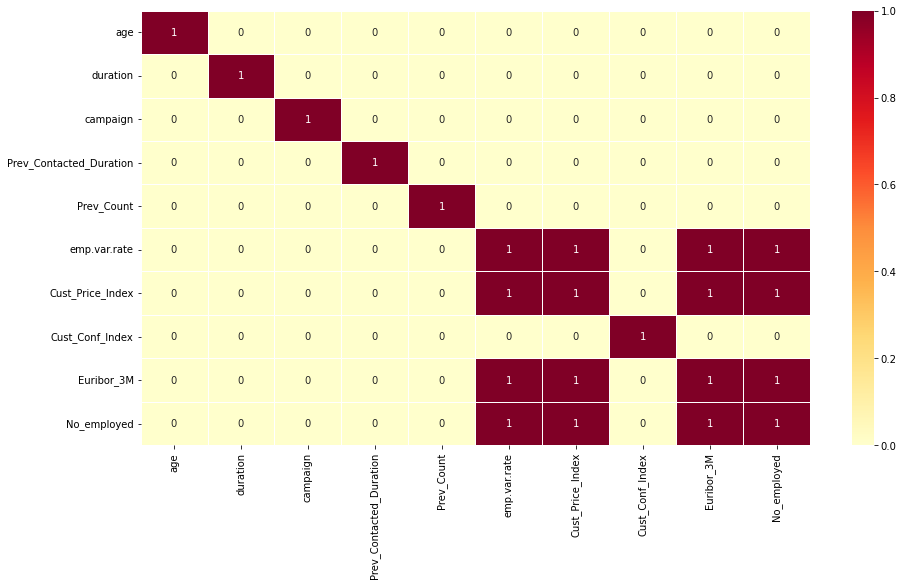

In [92]:
sns.heatmap(df.corr()>0.5,lw=1,linecolor='white',cmap='YlOrRd',annot=True)

Based on Correlation matrix we can say that some variables are so highly related that only one of them would suffice for model building
'Positive high correlation between:'
1. 'emp.var.rate' and 'no_employed'
2. 'emp.var.rate' and 'Euribor_3m'
3. 'Euribor_3m' and 'nr.no_employed'

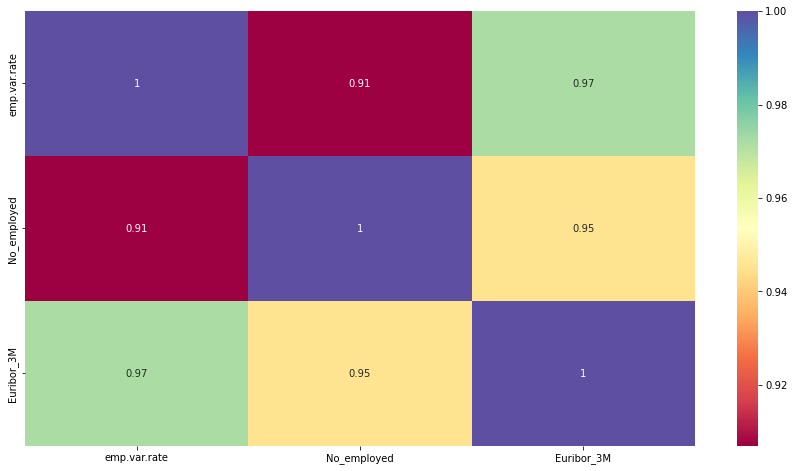

In [93]:
sns.heatmap(df[["emp.var.rate", "No_employed", "Euribor_3M"]].corr(), annot=True, cmap='Spectral')
plt.show()

In [94]:
df.drop(["No_employed", "emp.var.rate"], axis=1, inplace=True)

In [95]:
df.head()

,age,job,Marital_Status,education,default,housing,loan,contact,month,day_of_week,duration,campaign,Prev_Contacted_Duration,Prev_Count,poutcome,Cust_Price_Index,Cust_Conf_Index,Euribor_3M,Term_Deposit
0,56,housemaid,married,4_class,no,no,no,telephone,may,mon,261.0,1,16,0,nonexistent,93.994,-36.4,4.857,no
1,57,services,married,high.school,missing,no,no,telephone,may,mon,149.0,1,16,0,nonexistent,93.994,-36.4,4.857,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226.0,1,16,0,nonexistent,93.994,-36.4,4.857,no
3,40,admin.,married,6_class,no,no,no,telephone,may,mon,151.0,1,16,0,nonexistent,93.994,-36.4,4.857,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307.0,1,16,0,nonexistent,93.994,-36.4,4.857,no


# Statistical Analysis

## Chi Square Test

In [96]:
#Importing neccessary libraries for statistical analysis
import scipy.stats as stats
import statistics as stat
from scipy import stats
from scipy.stats import chi2_contingency
from scipy.stats import chi2
from scipy.stats import chisquare

In [97]:
df_cat=df.select_dtypes(include=['object'])
df_cat.head()

,job,Marital_Status,education,default,housing,loan,contact,month,day_of_week,poutcome,Term_Deposit
0,housemaid,married,4_class,no,no,no,telephone,may,mon,nonexistent,no
1,services,married,high.school,missing,no,no,telephone,may,mon,nonexistent,no
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,no
3,admin.,married,6_class,no,no,no,telephone,may,mon,nonexistent,no
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,no


In [98]:
for i in df_cat.columns[0:10]:
    table=pd.crosstab(df_cat[i],df['Term_Deposit'])
    stat,pval,dof,arr=chi2_contingency(table)
    print(i,' p-value:',pval)
    print()

job  p-value: 6.808199923441661e-200

Marital_Status  p-value: 5.915954286692898e-27

education  p-value: 8.692046071480118e-39

default  p-value: 5.1619579513916376e-89

housing  p-value: 0.025479312776658963

loan  p-value: 0.37633537946635287

contact  p-value: 1.5259856523129964e-189

month  p-value: 0.0

day_of_week  p-value: 2.9584820052785324e-05

poutcome  p-value: 0.0



We can notice that the p-value of job,Marital_Status,education,housing,contact,month,day_of_week,poutcome are lesser than the significance level (0.05). Thus we reject the null hypothesis, concluding that these variables are significant in predicting the outcome of Term_Deposit. Therefore they are Term_deposit is dependent over these variable. Whereas loan and default variables are insignificant for the analysis

### Statistical Analysis for numerical variables

In [99]:
df_num=df.select_dtypes(include='number')
df_num.head()

,age,duration,campaign,Prev_Contacted_Duration,Prev_Count,Cust_Price_Index,Cust_Conf_Index,Euribor_3M
0,56,261.0,1,16,0,93.994,-36.4,4.857
1,57,149.0,1,16,0,93.994,-36.4,4.857
2,37,226.0,1,16,0,93.994,-36.4,4.857
3,40,151.0,1,16,0,93.994,-36.4,4.857
4,56,307.0,1,16,0,93.994,-36.4,4.857


In [100]:
for i in df_num.columns:
    df_no_num=df[df['Term_Deposit']=='no'][i]
    df_yes_num=df[df['Term_Deposit']=='yes'][i]
    sta,pval=stats.shapiro(df_num[i])
    Lsta,Lpval=stats.levene(df_no_num,df_yes_num)
    print(i,'shapiro p-value:',pval)
    print(i,'levene p-value:',Lpval)
    print('skew:',df_num[i].skew())
    print()

age shapiro p-value: 0.0
age levene p-value: 2.7953829564964153e-132
skew: 0.5776408529043923

duration shapiro p-value: 0.0
duration levene p-value: 0.0
skew: 1.2794877081009006

campaign shapiro p-value: 0.0
campaign levene p-value: 5.2007453681134995e-33
skew: 2.0625814118436576

Prev_Contacted_Duration shapiro p-value: 0.0
Prev_Contacted_Duration levene p-value: 0.0
skew: -5.545280998108669

Prev_Count shapiro p-value: 0.0
Prev_Count levene p-value: 0.0
skew: 3.250684518652297

Cust_Price_Index shapiro p-value: 0.0
Cust_Price_Index levene p-value: 2.0231256553645675e-53
skew: -0.23088765135788006

Cust_Conf_Index shapiro p-value: 0.0
Cust_Conf_Index levene p-value: 3.7470625338730136e-227
skew: 0.30317985874819237

Euribor_3M shapiro p-value: 0.0
Euribor_3M levene p-value: 1.0867852390321454e-06
skew: -0.7091879563778298



As the p-value of all variables are less than the significance level we reject the null Hypothesis.Thus we can conclude that numeric variables do not have a normal distribution and equal variance.
Since these variables do not satisfy the assumptions of being normal and having equal variance, We proceed with non-parametric test,Mannwhitney-U test.

## Mannwhitney-U test

In [101]:
# Null : Variables are Independent 

# Altr : Variables are Dependent

In [102]:
for i in df_num.columns:
    df_no_num=df[df['Term_Deposit']=='no'][i]
    df_yes_num=df[df['Term_Deposit']=='yes'][i]
    
    print(i,':',stats.mannwhitneyu(df_no_num,df_yes_num))
    print()

age : MannwhitneyuResult(statistic=86629935.0, pvalue=0.015905272139024228)

duration : MannwhitneyuResult(statistic=30863568.0, pvalue=0.0)

campaign : MannwhitneyuResult(statistic=94147718.5, pvalue=3.8135037238365256e-38)

Prev_Contacted_Duration : MannwhitneyuResult(statistic=100871006.0, pvalue=0.0)

Prev_Count : MannwhitneyuResult(statistic=66257808.0, pvalue=0.0)

Cust_Price_Index : MannwhitneyuResult(statistic=103540748.5, pvalue=9.572608866919173e-136)

Cust_Conf_Index : MannwhitneyuResult(statistic=78464908.5, pvalue=5.901951166896614e-17)

Euribor_3M : MannwhitneyuResult(statistic=126080978.5, pvalue=0.0)



From above result obtained we can observe that all numerical variables have p-value less than significance level, we reject the null hypothesis and conclude that all these variables significantly impact the prediction of Term_deposit.

# Data Preparation and Feature Engineering

In [103]:
df1=df.copy()
df1.head()

,age,job,Marital_Status,education,default,housing,loan,contact,month,day_of_week,duration,campaign,Prev_Contacted_Duration,Prev_Count,poutcome,Cust_Price_Index,Cust_Conf_Index,Euribor_3M,Term_Deposit
0,56,housemaid,married,4_class,no,no,no,telephone,may,mon,261.0,1,16,0,nonexistent,93.994,-36.4,4.857,no
1,57,services,married,high.school,missing,no,no,telephone,may,mon,149.0,1,16,0,nonexistent,93.994,-36.4,4.857,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226.0,1,16,0,nonexistent,93.994,-36.4,4.857,no
3,40,admin.,married,6_class,no,no,no,telephone,may,mon,151.0,1,16,0,nonexistent,93.994,-36.4,4.857,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307.0,1,16,0,nonexistent,93.994,-36.4,4.857,no


In [104]:
#To encode the variables we need to do label encoding 
for i in list(df.columns):
    if df[i].dtype == 'object':
        df[i]=pd.factorize(df[i])[0]
df.head()

,age,job,Marital_Status,education,default,housing,loan,contact,month,day_of_week,duration,campaign,Prev_Contacted_Duration,Prev_Count,poutcome,Cust_Price_Index,Cust_Conf_Index,Euribor_3M,Term_Deposit
0,56,0,0,0,0,0,0,0,0,0,261.0,1,16,0,0,93.994,-36.4,4.857,0
1,57,1,0,1,1,0,0,0,0,0,149.0,1,16,0,0,93.994,-36.4,4.857,0
2,37,1,0,1,0,1,0,0,0,0,226.0,1,16,0,0,93.994,-36.4,4.857,0
3,40,2,0,2,0,0,0,0,0,0,151.0,1,16,0,0,93.994,-36.4,4.857,0
4,56,1,0,1,0,0,1,0,0,0,307.0,1,16,0,0,93.994,-36.4,4.857,0


In [105]:
# Correlation between variables with respect to the target variable
df.corr()['Term_Deposit'].drop('Term_Deposit').sort_values()

Prev_Contacted_Duration   -0.309023
Euribor_3M                -0.307771
Cust_Price_Index          -0.136211
default                   -0.099352
campaign                  -0.070797
loan                      -0.004466
day_of_week                0.010051
housing                    0.011085
age                        0.021543
Marital_Status             0.025622
education                  0.041815
Cust_Conf_Index            0.054878
job                        0.054930
contact                    0.144773
month                      0.183471
Prev_Count                 0.231740
poutcome                   0.270373
duration                   0.412365
Name: Term_Deposit, dtype: float64

# Handling Imbalanced Data

<AxesSubplot:xlabel='Term_Deposit', ylabel='count'>

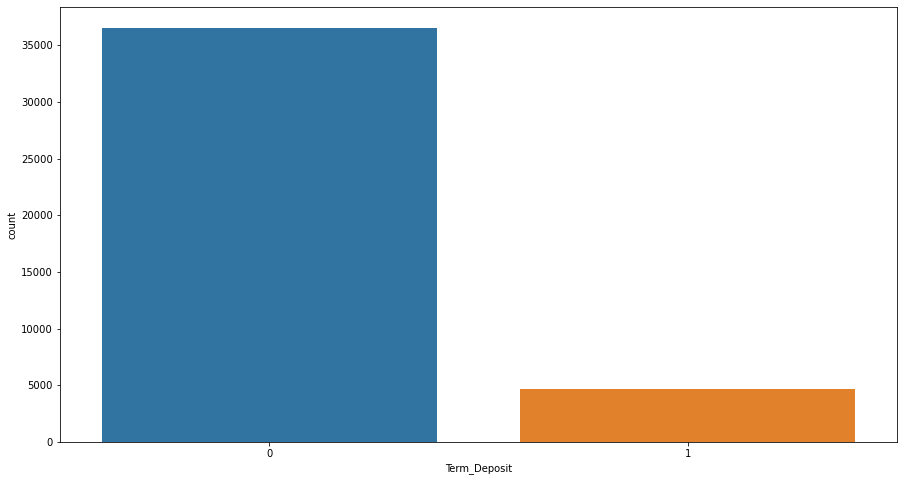

In [106]:
sns.countplot(df["Term_Deposit"])

In [107]:
df["Term_Deposit"].value_counts()*100/df["Term_Deposit"].count()

0    88.734583
1    11.265417
Name: Term_Deposit, dtype: float64

In [108]:
X=df.drop("Term_Deposit", axis=1)
Y=df["Term_Deposit"]


In [109]:
#We can see the data is highly imbalanced with a ratio of 88:11 
#We will use Smote Technique to balance the data
oversample = SMOTE()
X1,Y1 = oversample.fit_resample(X,Y)
Y1=pd.DataFrame(Y1)


<AxesSubplot:xlabel='Term_Deposit', ylabel='count'>

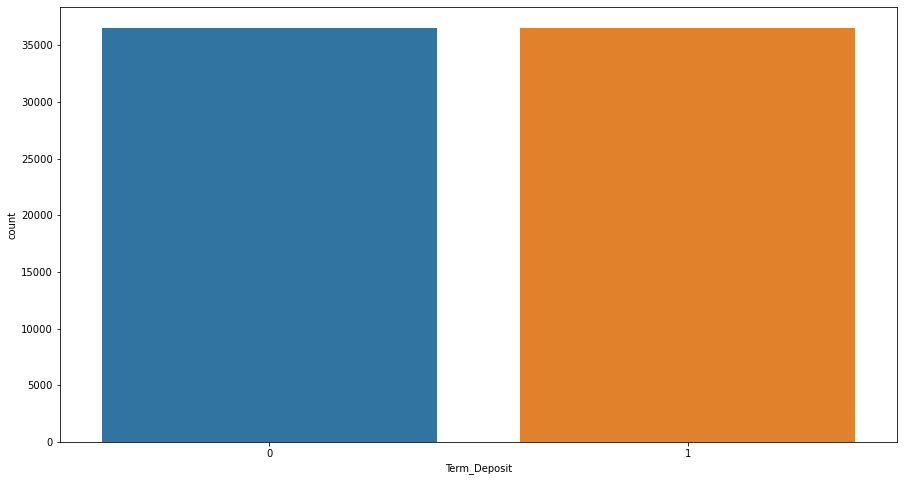

In [110]:
sns.countplot(Y1["Term_Deposit"])

In [111]:
Y1["Term_Deposit"].value_counts()*100/Y1["Term_Deposit"].count()

0    50.0
1    50.0
Name: Term_Deposit, dtype: float64

In [112]:
Y1.count()

Term_Deposit    73096
dtype: int64

# Business Questions

### 1 - What is the average duration (in seconds) of the call for those who did not make a term deposit (0) ? And for those who made term deposits (1)?
> For those who made term deposits (1), the average time was 465 seconds. For those who did not make a term deposit (0), the average time was 213 seconds. It means that, for a customer to make a term deposit, more time is needed to convince him/her.

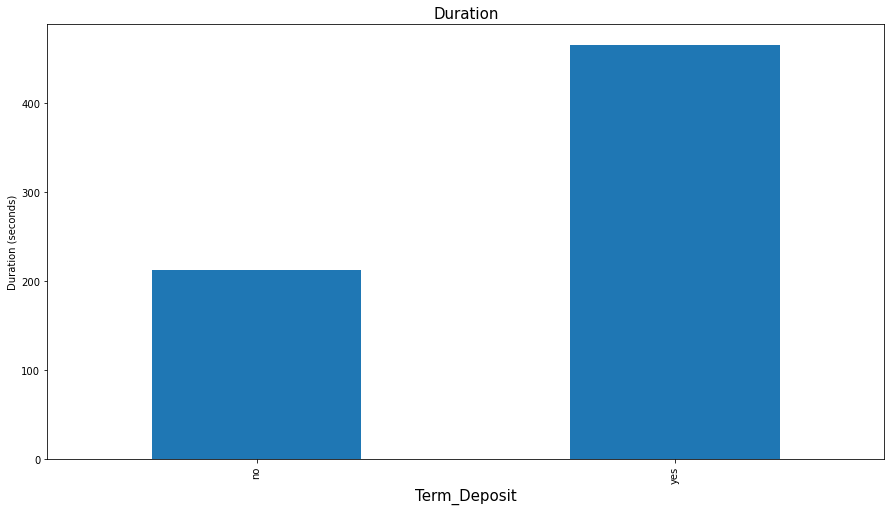

Term_Deposit
no     213.096691
yes    465.365550
Name: duration, dtype: float64


In [113]:
time = df1.groupby('Term_Deposit').duration.mean()
time.plot.bar()
plt.title('Duration', fontsize = 15)
plt.xlabel('Term_Deposit', fontsize = 15)
plt.ylabel('Duration (seconds)')
plt.show()

print(time)

### 2 - In which month do customers usually make the most deposits?
> May is the month when most customers make a term deposit

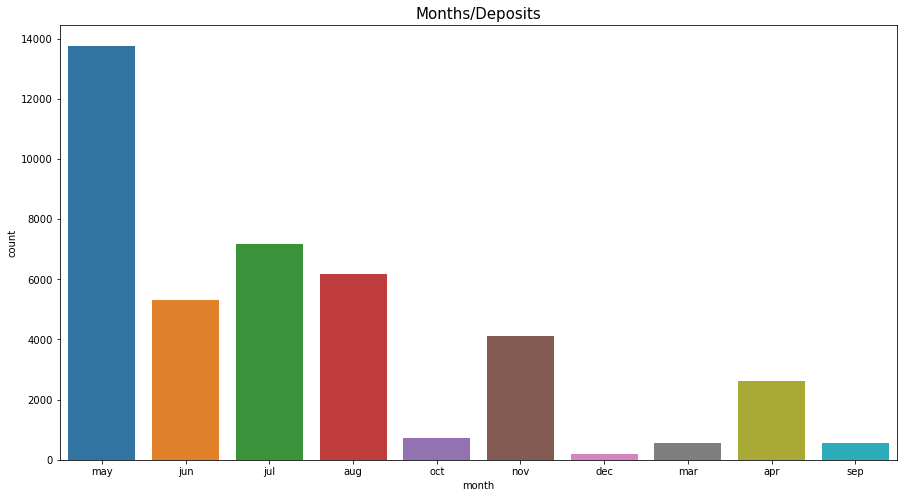

In [114]:
plt.title('Months/Deposits', fontsize = 15)
sns.countplot(df1['month'])
plt.show()

### 3 - Among those who made bank deposits, what was the main form of contact?
> The main form of contact is the cellular. Few customers who made term bank deposits were contacted by telephone.

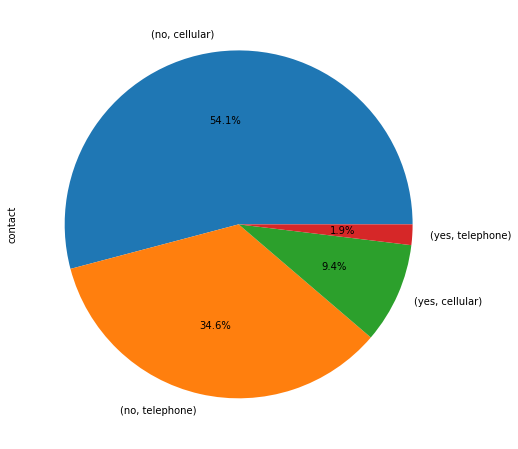

In [115]:
df1.groupby('Term_Deposit').contact.value_counts().plot.pie(autopct='%1.1f%%')
plt.show()

### 4 - What type of job is most common among those who made bank deposits?
> Admin.

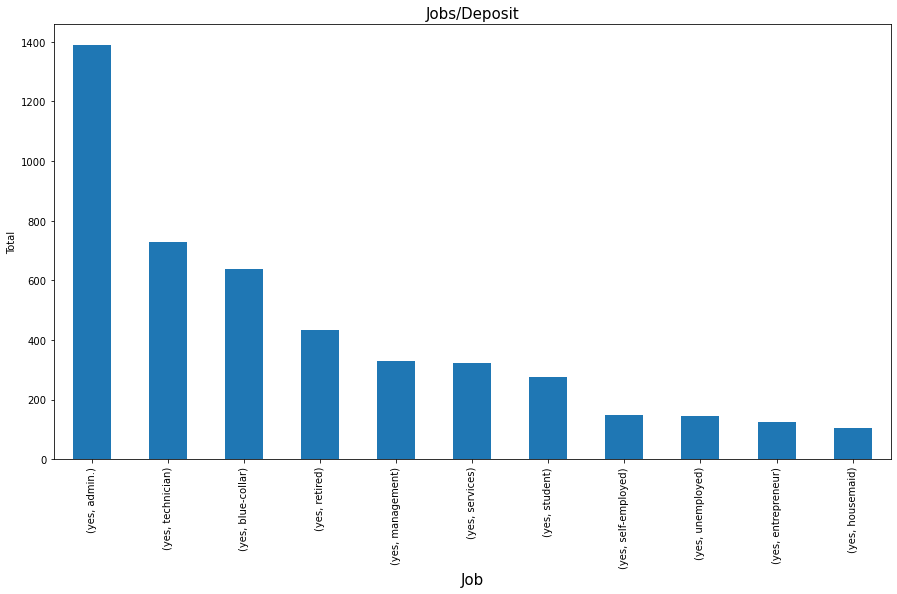

In [116]:
jobs = df1[df['Term_Deposit'] == 1].groupby('Term_Deposit').job.value_counts()
jobs.plot.bar()

plt.title('Jobs/Deposit', fontsize = 15)
plt.xlabel('Job', fontsize = 15)
plt.ylabel('Total')

plt.show()

### 5 - What is the Age Distribution of Customers?
> Between 25 and 50 years old

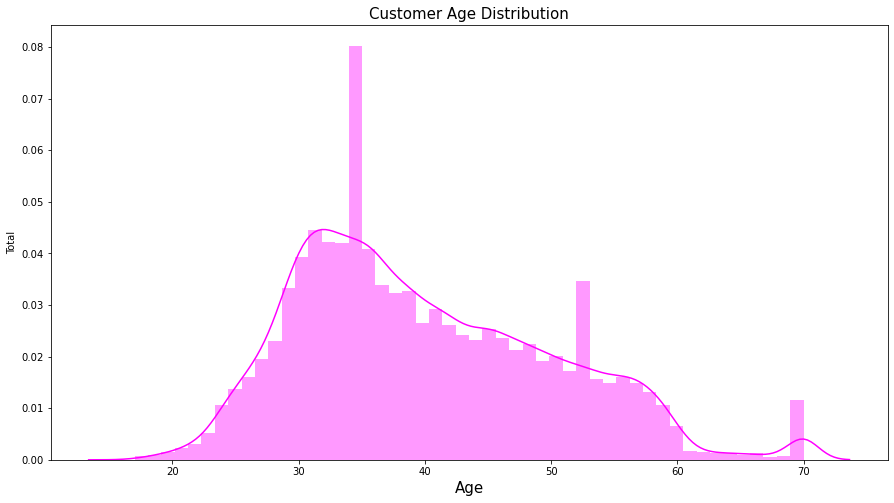

In [117]:
sns.distplot(df['age'], color = 'magenta')
plt.title('Customer Age Distribution', fontsize = 15)
plt.xlabel('Age', fontsize = 15)
plt.ylabel('Total')
plt.show()

### Splitting of Data

In [118]:

X_train, X_test, y_train, y_test = train_test_split(X1, Y1, random_state = 10, test_size = 0.2)

# print dimension of train set
print('X_train', X_train.shape)
print('y_train', y_train.shape)

# print dimension of test set
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (58476, 18)
y_train (58476, 1)
X_test (14620, 18)
y_test (14620, 1)


#### Creating Generalised functions for some parameters

In [119]:
def get_test_report(model, test_data):

    test_pred = model.predict(test_data)
    return(classification_report(y_test, test_pred))

In [120]:
def get_test_report(model, train_data):

    train_pred = model.predict(train_data)
    return(classification_report(y_train, train_pred))

In [121]:
def plot_confusion_matrix(model, test_data):
    
    # predict the target values using X_test
    y_pred = model.predict(test_data)
    cm = confusion_matrix(y_test, y_pred)
    conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

    sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
                linewidths = 0.1, annot_kws = {'size':25})
    plt.xticks(fontsize = 20)

    plt.yticks(fontsize = 20)
    plt.show()

In [122]:
def plot_roc(model):
    y_pred_prob = model.predict_proba(X_test)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

    plt.plot(fpr, tpr)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])

    plt.plot([0, 1], [0, 1],'r--')

    plt.title('ROC curve for Admission Prediction Classifier', fontsize = 15)
    plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
    plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

    plt.text(x = 0.82, y = 0.3, s = ('AUC Score:',round(roc_auc_score(y_test, y_pred_prob),4)))

    plt.grid(True)

In [123]:
#Importing the neccessary libraries for model building
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from matplotlib.colors import ListedColormap
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Decision Tree

## Base Model without Hyperparameters

In [124]:
decision_tree_class=DecisionTreeClassifier(criterion='entropy',random_state=10)
decision_tree=decision_tree_class.fit(X_train,y_train)

In [125]:
print(classification_report(y_train,decision_tree.predict(X_train)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     29216
           1       1.00      1.00      1.00     29260

    accuracy                           1.00     58476
   macro avg       1.00      1.00      1.00     58476
weighted avg       1.00      1.00      1.00     58476



In [126]:
print(classification_report(y_test,decision_tree.predict(X_test)))

              precision    recall  f1-score   support

           0       0.94      0.93      0.93      7332
           1       0.93      0.94      0.93      7288

    accuracy                           0.93     14620
   macro avg       0.93      0.93      0.93     14620
weighted avg       0.93      0.93      0.93     14620



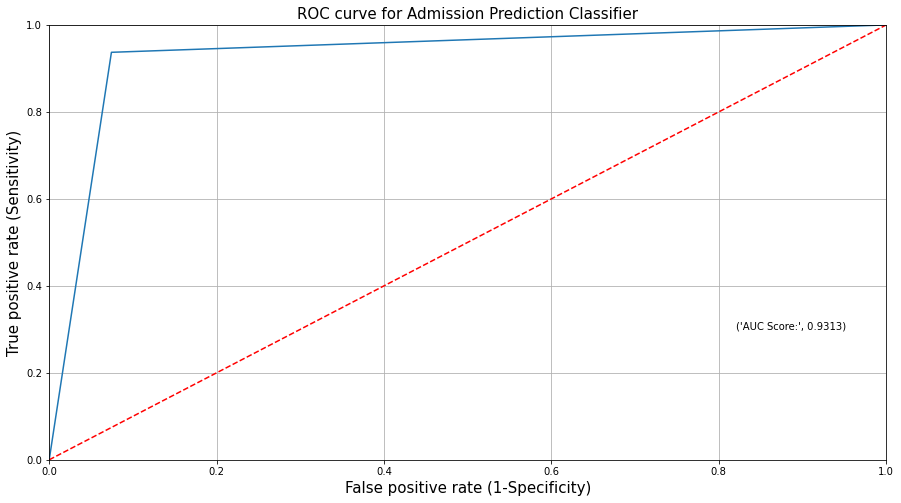

In [127]:
plot_roc(decision_tree)

In [128]:
pred=decision_tree.predict(X_test)
accuracy_score(y_test, pred)

0.931326949384405

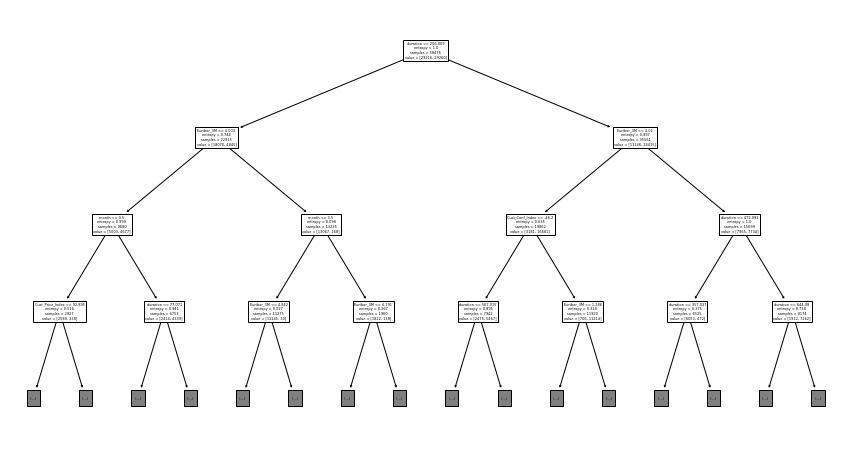

In [129]:
tree.plot_tree(decision_tree,max_depth=3,feature_names=X_train.columns)
plt.show()

## Decision tree after post pruning

In [130]:
path = decision_tree.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [131]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.16281293920191198


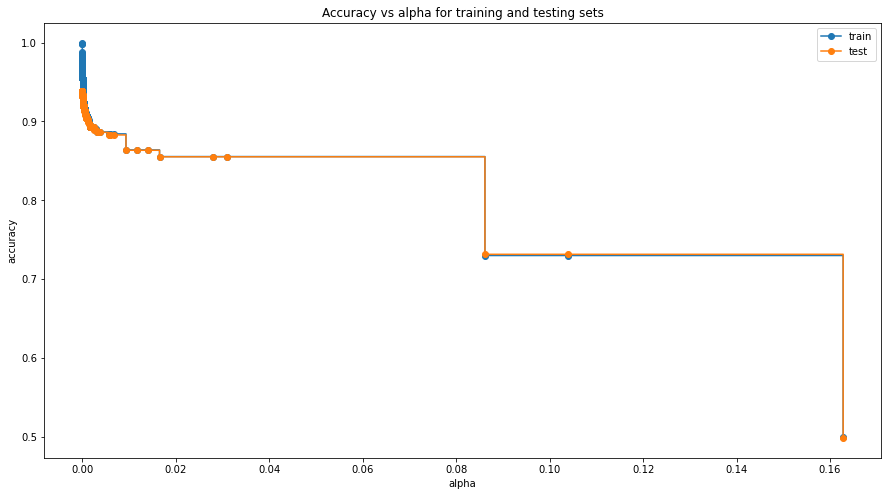

In [132]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [133]:
clf = DecisionTreeClassifier(random_state=0, ccp_alpha=0.001)
clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.001, random_state=0)

In [134]:
print(classification_report(y_test,clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.94      0.86      0.90      7332
           1       0.87      0.95      0.91      7288

    accuracy                           0.90     14620
   macro avg       0.91      0.90      0.90     14620
weighted avg       0.91      0.90      0.90     14620



In [135]:
pred=clf.predict(X_test)
accuracy_score(y_test, pred)

0.9046511627906977

## Model after selecting important features and hyperparameter tuning.

In [136]:
important_features=pd.DataFrame({'Features':X_train.columns,'Importance':decision_tree.feature_importances_})
important_features=important_features.sort_values(by='Importance',ascending=False)

<AxesSubplot:xlabel='Importance', ylabel='Features'>

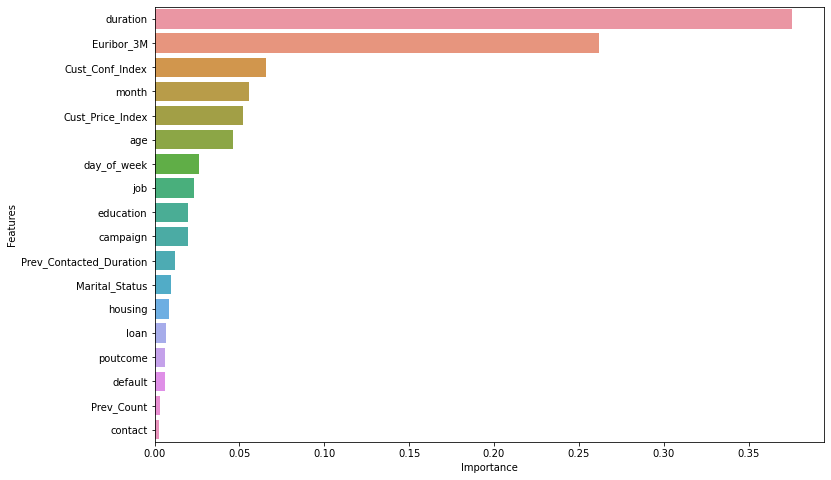

In [137]:
plt.figure(figsize=(12,8))
sns.barplot(x=important_features['Importance'],y=important_features['Features'])

In [138]:
new_x_train=X_train[list(important_features.head(10)['Features'])]
new_x_test=X_test[list(important_features.head(10)['Features'])]

In [139]:
tuned_parameters={'criterion':['entropy', 'gini'],'max_depth':range(2, 10),'min_samples_split':range(2,10)}
decision_tree_algo=DecisionTreeClassifier(random_state=10)

In [143]:

tree_grid = GridSearchCV(estimator = decision_tree_algo, 
                         param_grid = tuned_parameters, 
                         cv = 5)
tree_grid_model = tree_grid.fit(new_x_train, y_train)

print('Best parameters for decision tree classifier: ', tree_grid_model.best_params_, '\n')

Best parameters for decision tree classifier:  {'criterion': 'gini', 'max_depth': 9, 'min_samples_split': 2} 



In [140]:
dt_model1 = DecisionTreeClassifier(**tree_grid_model.best_params_,random_state=10)
dt_model = dt_model1.fit(new_x_train, y_train)
dt_model

NameError: name 'tree_grid_model' is not defined

In [141]:
print(classification_report(y_train,dt_model.predict(new_x_train)))

NameError: name 'dt_model' is not defined

In [142]:
print(classification_report(y_test,dt_model.predict(new_x_test)))

NameError: name 'dt_model' is not defined

In [168]:
pred=dt_model.predict(new_x_test)
accuracy_score(y_test, pred)

0.9200410396716826

#  Random Forest for Classification

In [173]:
rf_classification = RandomForestClassifier(n_estimators = 10, random_state = 10)

rf_model = rf_classification.fit(X_train, y_train)

In [174]:
print(classification_report(y_train,rf_model.predict(X_train)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     29216
           1       1.00      1.00      1.00     29260

    accuracy                           1.00     58476
   macro avg       1.00      1.00      1.00     58476
weighted avg       1.00      1.00      1.00     58476



In [175]:
print(classification_report(y_test,rf_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95      7332
           1       0.94      0.96      0.95      7288

    accuracy                           0.95     14620
   macro avg       0.95      0.95      0.95     14620
weighted avg       0.95      0.95      0.95     14620



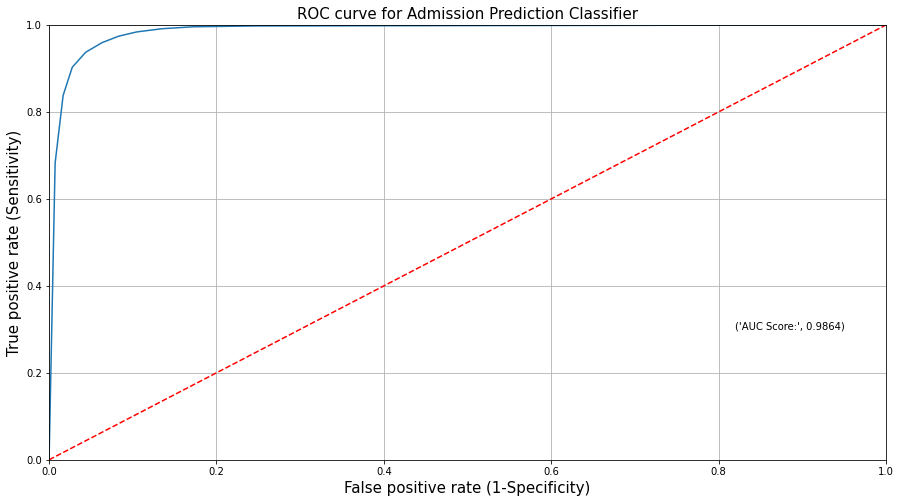

In [176]:
plot_roc(rf_model)

## Identify the Important Features

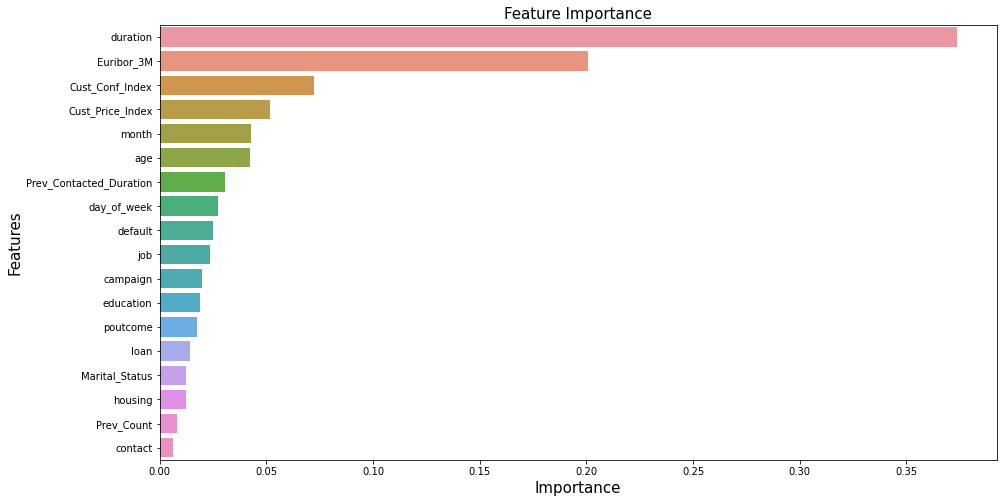

In [177]:
important_features = pd.DataFrame({'Features': X_train.columns, 
                                   'Importance': rf_model.feature_importances_})


important_features = important_features.sort_values('Importance', ascending = False)


sns.barplot(x = 'Importance', y = 'Features', data = important_features)


plt.title('Feature Importance', fontsize = 15)
plt.xlabel('Importance', fontsize = 15)
plt.ylabel('Features', fontsize = 15)

plt.show()

# XG Boost

In [178]:
gboost_model = GradientBoostingClassifier(n_estimators = 40, max_depth = 10, random_state = 10)

gboost_model.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=10, n_estimators=40, random_state=10)

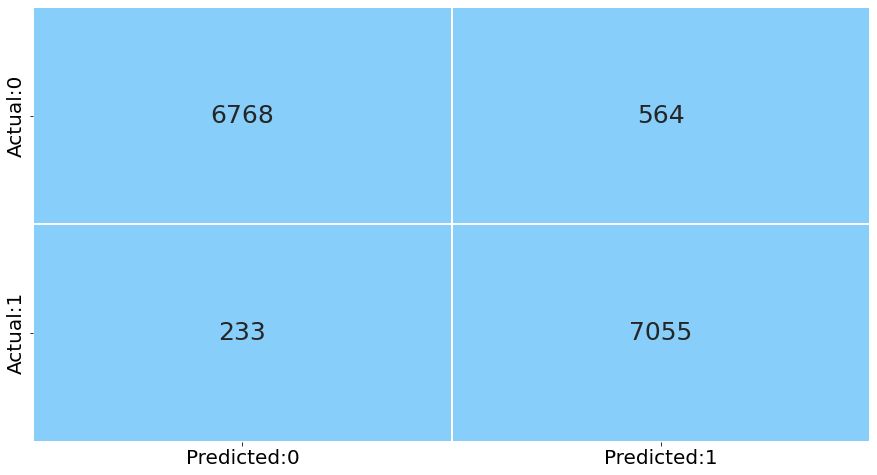

In [179]:
plot_confusion_matrix(gboost_model, X_test)

In [180]:
print(classification_report(y_train,gboost_model.predict(X_train)))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98     29216
           1       0.97      0.99      0.98     29260

    accuracy                           0.98     58476
   macro avg       0.98      0.98      0.98     58476
weighted avg       0.98      0.98      0.98     58476



In [181]:
print(classification_report(y_test,gboost_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      0.92      0.94      7332
           1       0.93      0.97      0.95      7288

    accuracy                           0.95     14620
   macro avg       0.95      0.95      0.95     14620
weighted avg       0.95      0.95      0.95     14620



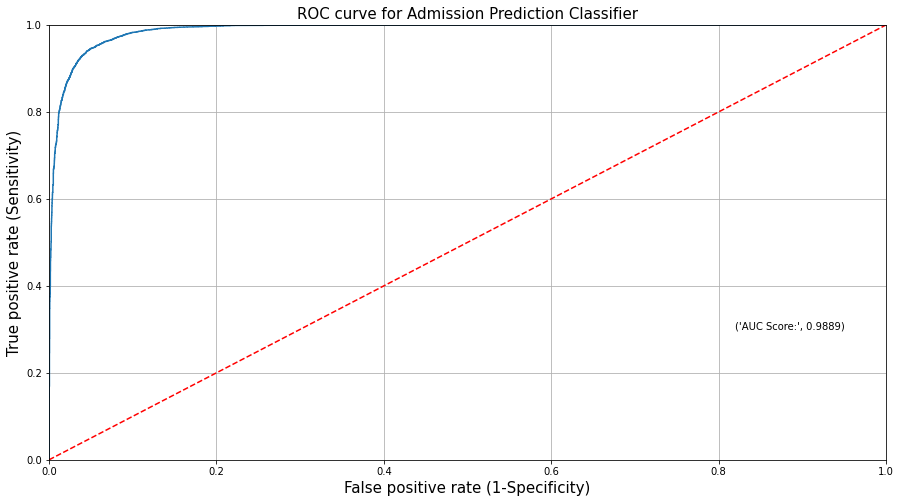

In [182]:
plot_roc(gboost_model)

In [185]:
pred=gboost_model.predict(X_test)
accuracy_score(y_test, pred)

0.9454856361149111

## Model after selecting important features and hyperparameter tuning.

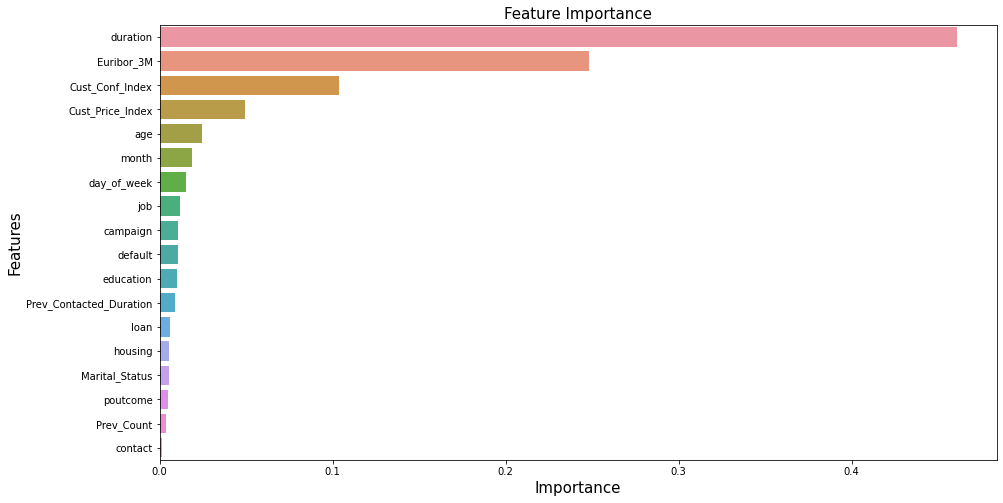

In [186]:
important_features = pd.DataFrame({'Features': X_train.columns, 
                                   'Importance': gboost_model.feature_importances_})

important_features = important_features.sort_values('Importance', ascending = False)
sns.barplot(x = 'Importance', y = 'Features', data = important_features)

plt.title('Feature Importance', fontsize = 15)
plt.xlabel('Importance', fontsize = 15)
plt.ylabel('Features', fontsize = 15)

plt.show()

In [187]:
new_x_train=X_train[list(important_features.head(10)['Features'])]
new_x_test=X_test[list(important_features.head(10)['Features'])]

In [188]:
tuning_parameters = {'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6],
                     'max_depth': range(3,10),
                     'gamma': [0, 1, 2, 3, 4]}
xgb_model = XGBClassifier()

xgb_grid = GridSearchCV(estimator = xgb_model, param_grid = tuning_parameters, cv = 3, scoring = 'roc_auc')

xgb_grid.fit(new_x_train, y_train)

# get the best parameters
print('Best parameters for XGBoost classifier: ', xgb_grid.best_params_, '\n')

Best parameters for XGBoost classifier:  {'gamma': 0, 'learning_rate': 0.3, 'max_depth': 9} 



In [189]:
xgb_grid_model = XGBClassifier(learning_rate = xgb_grid.best_params_.get('learning_rate'),
                               max_depth = xgb_grid.best_params_.get('max_depth'),
                              gamma = xgb_grid.best_params_.get('gamma'))

xgb_model = xgb_grid_model.fit(new_x_train, y_train)

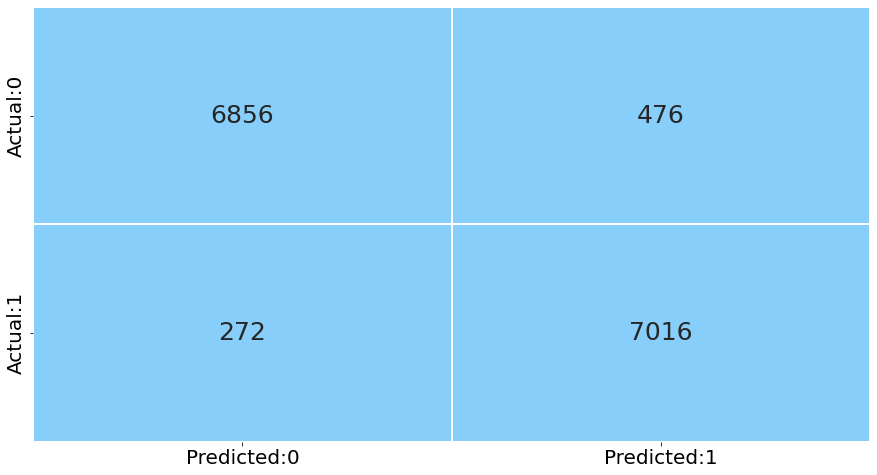

In [190]:
plot_confusion_matrix(xgb_model, new_x_test)

In [192]:
pred=xgb_model.predict(new_x_test)
accuracy_score(y_test, pred)

0.9488372093023256

In [193]:
print(classification_report(y_test,xgb_model.predict(new_x_test)))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95      7332
           1       0.94      0.96      0.95      7288

    accuracy                           0.95     14620
   macro avg       0.95      0.95      0.95     14620
weighted avg       0.95      0.95      0.95     14620

